<h3 style="text-align:right";>EL BABARTI Selma</h3>
<h2 style="text-align:right";>M1 MCN - SAE DATA</h2>

Ce notebook présente une étude des données des TGV `regularite_mensuelle_tgv.csv` extraits du site `sncf.com`. Nous allons ici faire l'étude de la qualité de service des TGV de la SNCF grâce à nos données. Nous allons notamment nous intéresser aux retards des trains, aux causes de ces retards, à la durée de ces retards, mais aussi aux annulations des trains. Nous allons manipuler les données de telle sorte que l'on puisse comprendre plusieurs dimensions de la qualité de ces services, à la fois sous le prisme des différents axes liant les gares mais aussi selon les périodes de l'année et cette problématique sera le fil conducteur de notre analyse. 

## <span style="color:red">Importation des bibliothèques</span>

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import pingouin as pg
from pandas import plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8) #taille des figures plt

pd.set_option('display.max_rows', 100) # capacité maximale d'affichage à 100 lignes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## <span style="color:red">Importation des fichiers CSV</span>

In [2]:
df = pd.read_csv("regularite_mensuelle_tgv.csv", sep=";") # pas d'indication d'index
df

Date   Service       Gare de départ       Gare d'arrivée  \
0     2018-01  National     BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1     2018-01  National    LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2     2018-01  National   PARIS MONTPARNASSE              QUIMPER   
3     2018-01  National   PARIS MONTPARNASSE              ST MALO   
4     2018-01  National   PARIS MONTPARNASSE  ST PIERRE DES CORPS   
...       ...       ...                  ...                  ...   
7300  2022-11  National   PARIS MONTPARNASSE                BREST   
7301  2022-11  National   PARIS MONTPARNASSE    TOULOUSE MATABIAU   
7302  2022-11  National   PARIS MONTPARNASSE               VANNES   
7303  2022-11  National           PARIS NORD                LILLE   
7304  2022-11  National  ST PIERRE DES CORPS   PARIS MONTPARNASSE   

      Durée moyenne du trajet  Nombre de circulations prévues  \
0                         141                             870   
1                         165                             222   
2                         220                             248   
3                         156                             102   
4                          61                             391   
...                       ...                             ...   
7300                      226                             247   
7301                      263                             199   
7302                      152                             242   
7303                       66                             585   
7304                       68                             517   

      Nombre de trains annulés  Commentaire annulations  \
0                            5                      NaN   
1                            0                      NaN   
2                            1                      NaN   
3                            0                      NaN   
4                            2                      NaN   
...                        ...                      ...   
7300                         1                      NaN   
7301                         0                      NaN   
7302                         0                      NaN   
7303                         5                      NaN   
7304                         1                      NaN   

      Nombre de trains en retard au départ  \
0                                      289   
1                                        8   
2                                       37   
3                                       12   
4                                       61   
...                                    ...   
7300                                    34   
7301                                    21   
7302                                    33   
7303                                    52   
7304                                   211   

      Retard moyen des trains en retard au départ  ...  \
0                                       11.247809  ...   
1                                        2.875000  ...   
2                                        9.501351  ...   
3                                       19.912500  ...   
4                                        7.796995  ...   
...                                           ...  ...   
7300                                    13.799510  ...   
7301                                     9.157143  ...   
7302                                    15.357576  ...   
7303                                    18.957692  ...   
7304                                     6.457899  ...   

      Nombre trains en retard > 15min  \
0                                 110   
1                                  22   
2                                  26   
3                                   8   
4                                  17   
...                               ...   
7300                               34   
7301                               17   
7302                               34   
7303                          

#### Clé du dataframe :

In [3]:
df.groupby(['Date','Gare de départ', "Gare d'arrivée"]).size() #primary key

Date     Gare de départ       Gare d'arrivée    
2018-01  AIX EN PROVENCE TGV  PARIS LYON            1
         ANGERS SAINT LAUD    PARIS MONTPARNASSE    1
         ANGOULEME            PARIS MONTPARNASSE    1
         ANNECY               PARIS LYON            1
         ARRAS                PARIS NORD            1
                                                   ..
2022-11  TOULOUSE MATABIAU    PARIS MONTPARNASSE    1
         TOURS                PARIS MONTPARNASSE    1
         VALENCE ALIXAN TGV   PARIS LYON            1
         VANNES               PARIS MONTPARNASSE    1
         ZURICH               PARIS LYON            1
Length: 7305, dtype: int64

#### Visualisation des variables :

In [4]:
df.nunique()

Date                                                                                             59
Service                                                                                           2
Gare de départ                                                                                   59
Gare d'arrivée                                                                                   59
Durée moyenne du trajet                                                                         385
Nombre de circulations prévues                                                                  774
Nombre de trains annulés                                                                        181
Commentaire annulations                                                                           0
Nombre de trains en retard au départ                                                            442
Retard moyen des trains en retard au départ                                                    7019


Il s'agit d'un tableau de **7305 lignes x 26 colonnes**. Les lignes représentent des **axes de liaisons (gare de départ - gare d'arrivée) par date** des TGV de la`sncf.com`. Les données concernent la période entre janvier 2018 et novembre 2022. Les colonnes décrivent leur durée moyenne de trajet en minutes, le nombre de circulations prévues, le nombre de trains annulés, le nombre de train en retard au départ et à l'arrivée, le retard moyen des trains en minutes et par tranches, et le pourcentages des retards en fonction de différentes causes.

#### Visualisation des types de variables :

In [5]:
df.dtypes

Date                                                                                            object
Service                                                                                         object
Gare de départ                                                                                  object
Gare d'arrivée                                                                                  object
Durée moyenne du trajet                                                                          int64
Nombre de circulations prévues                                                                   int64
Nombre de trains annulés                                                                         int64
Commentaire annulations                                                                        float64
Nombre de trains en retard au départ                                                             int64
Retard moyen des trains en retard au départ                              

Nos variables sont principalement des **entiers**, des **nombres décimaux** ou des **chaînes de caractères**. 

# <span style="color:red">I - Présentation du jeu de données</span>

#### Verification de valeurs manquantes :

In [6]:
df.isnull().sum()

Date                                                                                              0
Service                                                                                           0
Gare de départ                                                                                    0
Gare d'arrivée                                                                                    0
Durée moyenne du trajet                                                                           0
Nombre de circulations prévues                                                                    0
Nombre de trains annulés                                                                          0
Commentaire annulations                                                                        7305
Nombre de trains en retard au départ                                                              0
Retard moyen des trains en retard au départ                                                       0


Les valeurs manquantes ne concernent que les **commentaires**. Nous allons donc tout simplement supprimer ces variables qui ne nous intéressent pas pour notre analyse (car nous avons trop peu de données pour pouvoir les étudier). 

In [7]:
df = df.drop(['Commentaire annulations', 'Commentaire retards au départ', 'Commentaire retards à l\'arrivée' ], axis = 1)
df

Date   Service       Gare de départ       Gare d'arrivée  \
0     2018-01  National     BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1     2018-01  National    LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2     2018-01  National   PARIS MONTPARNASSE              QUIMPER   
3     2018-01  National   PARIS MONTPARNASSE              ST MALO   
4     2018-01  National   PARIS MONTPARNASSE  ST PIERRE DES CORPS   
...       ...       ...                  ...                  ...   
7300  2022-11  National   PARIS MONTPARNASSE                BREST   
7301  2022-11  National   PARIS MONTPARNASSE    TOULOUSE MATABIAU   
7302  2022-11  National   PARIS MONTPARNASSE               VANNES   
7303  2022-11  National           PARIS NORD                LILLE   
7304  2022-11  National  ST PIERRE DES CORPS   PARIS MONTPARNASSE   

      Durée moyenne du trajet  Nombre de circulations prévues  \
0                         141                             870   
1                         165                             222   
2                         220                             248   
3                         156                             102   
4                          61                             391   
...                       ...                             ...   
7300                      226                             247   
7301                      263                             199   
7302                      152                             242   
7303                       66                             585   
7304                       68                             517   

      Nombre de trains annulés  Nombre de trains en retard au départ  \
0                            5                                   289   
1                            0                                     8   
2                            1                                    37   
3                            0                                    12   
4                            2                                    61   
...                        ...                                   ...   
7300                         1                                    34   
7301                         0                                    21   
7302                         0                                    33   
7303                         5                                    52   
7304                         1                                   211   

      Retard moyen des trains en retard au départ  \
0                                       11.247809   
1                                        2.875000   
2                                        9.501351   
3                                       19.912500   
4                                        7.796995   
...                                           ...   
7300                                    13.799510   
7301                                     9.157143   
7302                                    15.357576   
7303                                    18.957692   
7304                                     6.457899   

      Retard moyen de tous les trains au départ  ...  \
0                                      3.693179  ...   
1                                      0.095796  ...   
2                                      1.003981  ...   
3                                      1.966667  ...   
4                                      0.886889  ...   
...                                         ...  ...   
7300                                   1.462060  ...   
7301                                   0.477303  ...   
7302                                   1.651722  ...   
7303                                   1.392820  ...   
7304                                   2.765342  ...   

      Nombre trains en retard > 15min  \
0                                 110   
1                                  22   
2                                  26   
3                                   8   
4                  

#### Vérification de doublons :

In [351]:
df.loc[df.duplicated(keep=False),:]

Empty DataFrame
Columns: [Date, Service, Gare de départ, Gare d'arrivée, Durée moyenne du trajet, Nombre de circulations prévues, Nombre de trains annulés, Nombre de trains en retard au départ, Retard moyen des trains en retard au départ, Retard moyen de tous les trains au départ, Nombre de trains en retard à l'arrivée, Retard moyen des trains en retard à l'arrivée, Retard moyen de tous les trains à l'arrivée, Nombre trains en retard > 15min, Retard moyen trains en retard > 15 (si liaison concurrencée par vol), Nombre trains en retard > 30min, Nombre trains en retard > 60min, Prct retard pour causes externes, Prct retard pour cause infrastructure, Prct retard pour cause gestion trafic, Prct retard pour cause matériel roulant, Prct retard pour cause gestion en gare et réutilisation de matériel, Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)]
Index: []

[0 rows x 23 columns]

Il n'y a **pas de doublons** dans notre jeu de données. 

# <span style="color:red">II - Analyse unidimensionnelle</span>

## Analyse statistique systématique exploratoire

Nous allons explorer les vairables qui nous intéressent le plus en visualisant leur **distribution**. Pour cela, nous allons générer un **histogramme** pour chacune d'entre elles et les **commenter**.

In [166]:
df.describe()

Durée moyenne du trajet  Nombre de circulations prévues  \
count              7305.000000                     7305.000000   
mean                169.410678                      251.908556   
std                  87.338632                      170.885287   
min                   0.000000                        0.000000   
25%                  99.000000                      138.000000   
50%                 163.000000                      217.000000   
75%                 221.000000                      325.000000   
max                 786.000000                     1033.000000   

       Nombre de trains annulés  Nombre de trains en retard au départ  \
count               7305.000000                           7305.000000   
mean                  10.183573                             89.440657   
std                   25.477609                             91.679306   
min                    0.000000                              0.000000   
25%                    0.000000                             22.000000   
50%                    2.000000                             56.000000   
75%                    8.000000                            130.000000   
max                  288.000000                            596.000000   

       Retard moyen des trains en retard au départ  \
count                                  7305.000000   
mean                                     10.831980   
std                                      12.773651   
min                                       0.000000   
25%                                       4.788889   
50%                                       8.614493   
75%                                      13.677297   
max                                     316.188095   

       Retard moyen de tous les trains au départ  \
count                                7305.000000   
mean                                    3.041317   
std                                     5.564841   
min                                  -229.269444   
25%                                     1.088871   
50%                                     2.208460   
75%                                     3.857642   
max                                    84.516667   

       Nombre de trains en retard à l'arrivée  \
count                             7305.000000   
mean                                33.955099   
std                                 29.774364   
min                                  0.000000   
25%                                 13.000000   
50%                                 26.000000   
75%                                 47.000000   
max                                376.000000   

       Retard moyen des trains en retard à l'arrivée  \
count                                    7305.000000   
mean                                       33.393974   
std                                        15.305675   
min                                       -40.109259   
25%                                        24.112500   
50%                                        31.962644   
75%                                        40.856790   
max                                       255.866667   

       Retard moyen de tous les trains à l'arrivée  \
count                                  7305.000000   
mean                                      5.564534   
std                                       8.327787   
min                                    -472.638889   
25%                                       3.041184   
50%                                       4.848780   
75%                                       7.517641   
max                                      92.000000   

       Nombre trains en retard > 15min  \
count                      7305.000000   
mean                         23.883231   
std                          21.384133   
min                           0.000000   
25%                           9.000000   
50%                          19.000000   
75%                          32.000000   
max                         

Si l'on regarde dans un premier temps les descripitions globales de toutes les vairables, nous pouvons nous faire une première idée sur les moyennes, les écarts-types, les quartiles, etc. Cela peut nous permettre de mieux comprendre les distributions. 

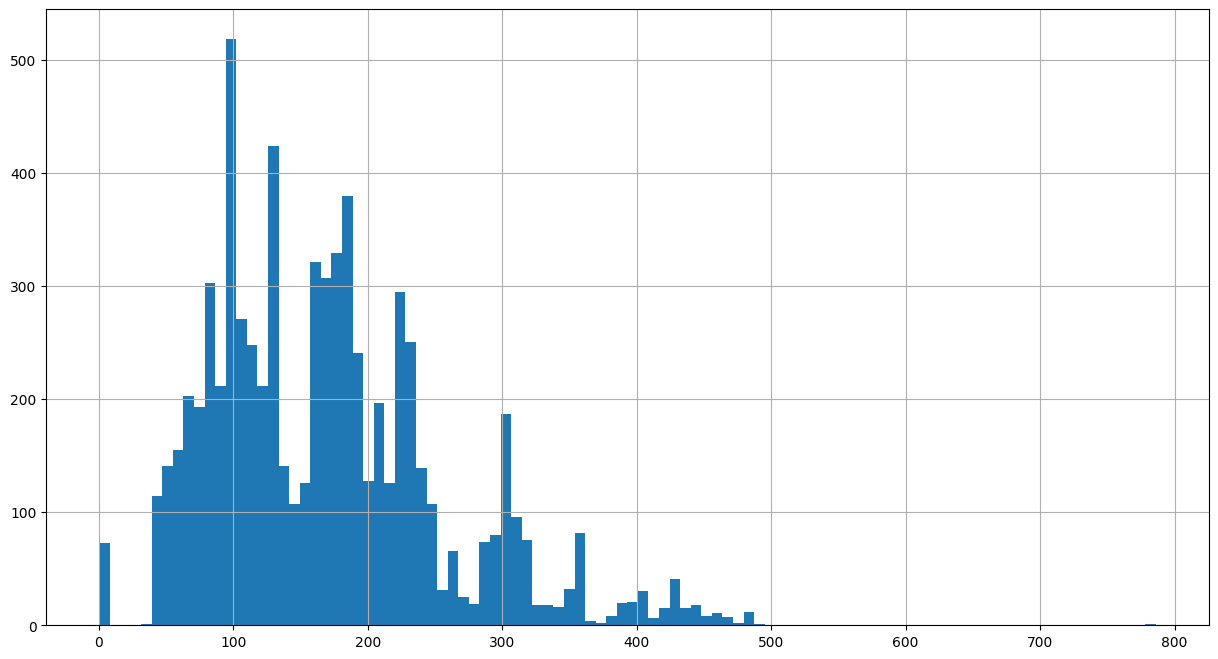

In [4]:
df['Durée moyenne du trajet'].hist(bins=100);

Nous remarquons que cette distribution semble **trimodale**. Les temps de trajets des trains se répartissent en **3 groupes** principaux : celui des temps de trajets moins long autour des **100 min**, un groupe qui tourne plutôt autour des **190 min** et un troisième groupe, qui concerne des temps de trajets plus long autour des **300 min**. 

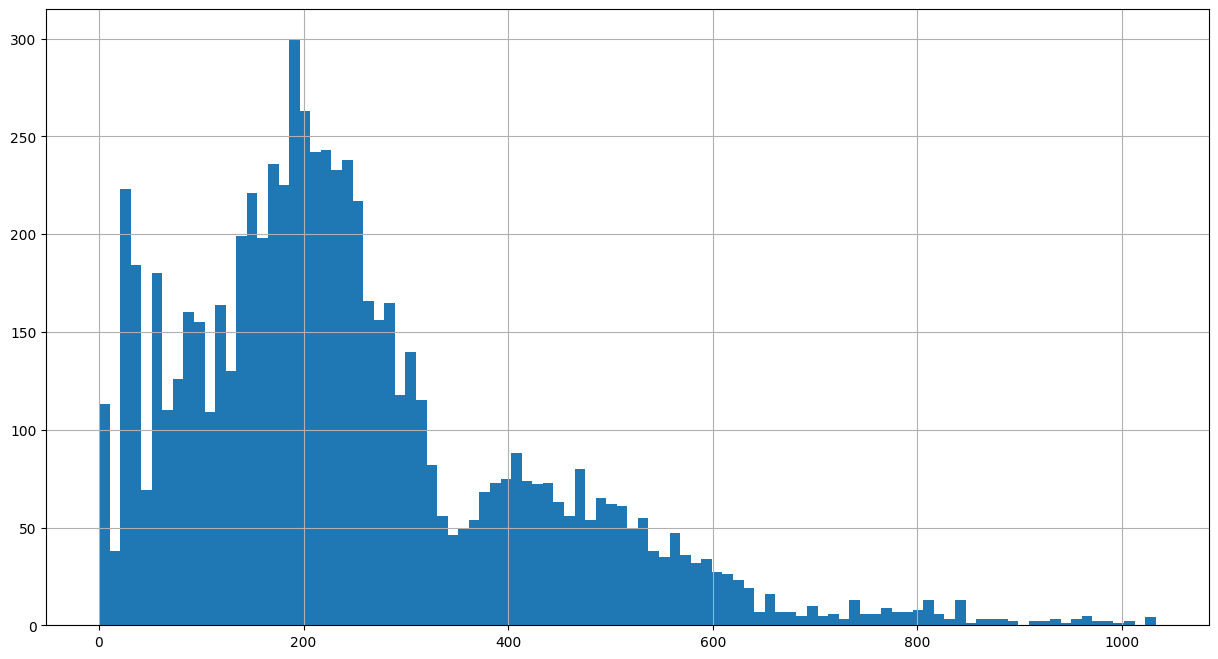

In [6]:
df['Nombre de circulations prévues'].hist(bins=100);

Nous remarquons une **distribution bimodale**. Le nombre de circulations des trains prévu gravite autour des **200 trains** puis nous observons un autre "pique" autour des **400**.

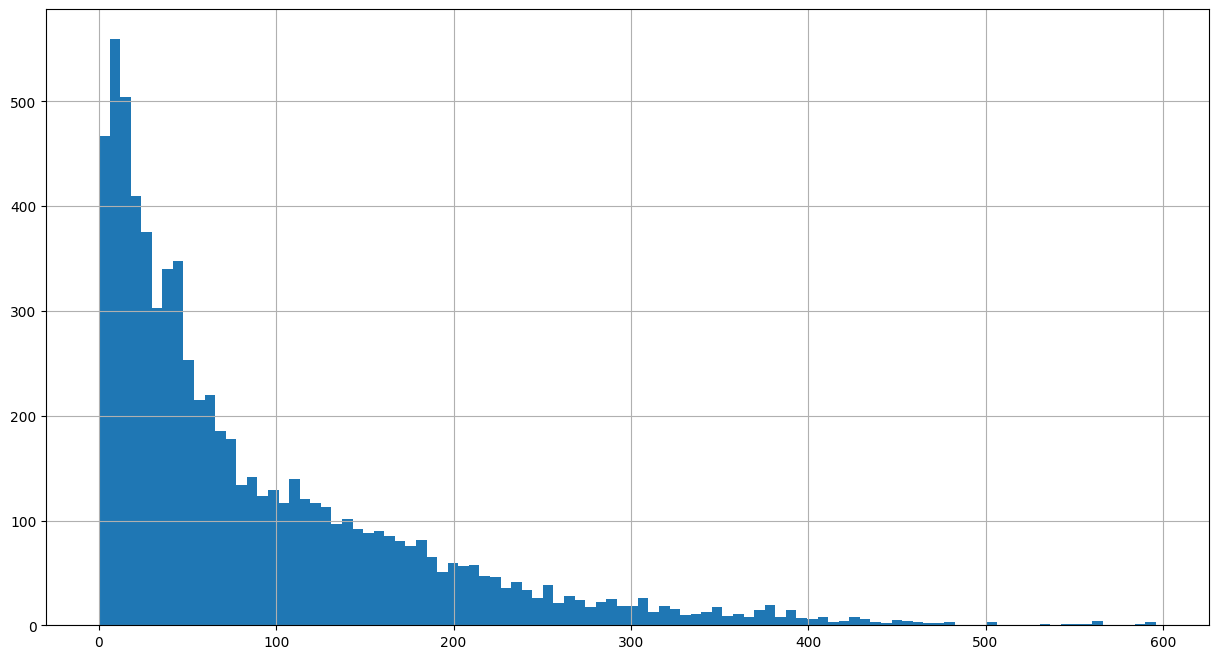

In [5]:
df['Nombre de trains annulés'].hist(bins = 100);
plt.show()
df['Nombre de trains en retard au départ'].hist(bins = 100);
plt.show()
df['Retard moyen des trains en retard au départ'].hist(bins = 100);
plt.show()
df['Nombre de trains en retard à l\'arrivée'].hist(bins = 100);
plt.show()

Pour toutes les distributions concernant le nombre et la durée des trains en retard soit au départ, soit à l'arrivée, nous remarquons une **tendance décroissante** : la plupart des trains n'ont pas de retard et plus l'on avance dans le retard en termes de minutes ou de quantité, moins les trains sont nombreux (l'inverse aurait été plus inquiétant en termes de qualité de service).

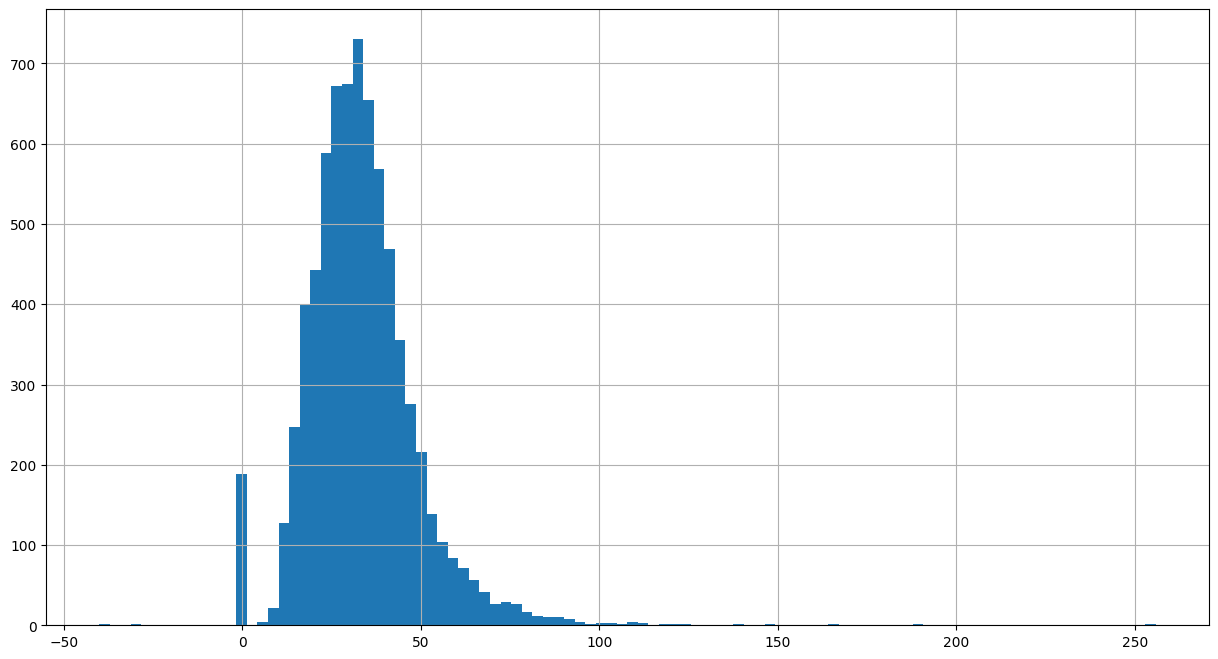

In [92]:
df['Retard moyen des trains en retard à l\'arrivée'].hist(bins = 100);

Concernant le retard moyen des trains à leur arrivée, nous remarquons en revanche une répartition suivant davatange une **loi normale** avec un pique à **30 min** de retard envrion. 

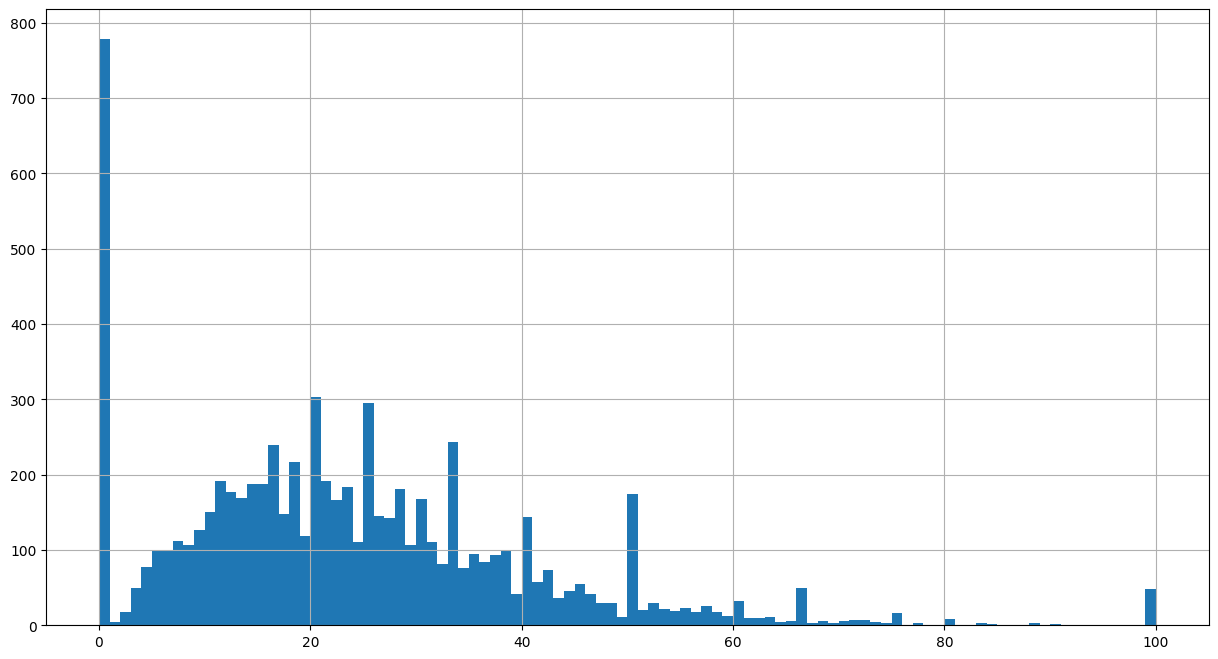

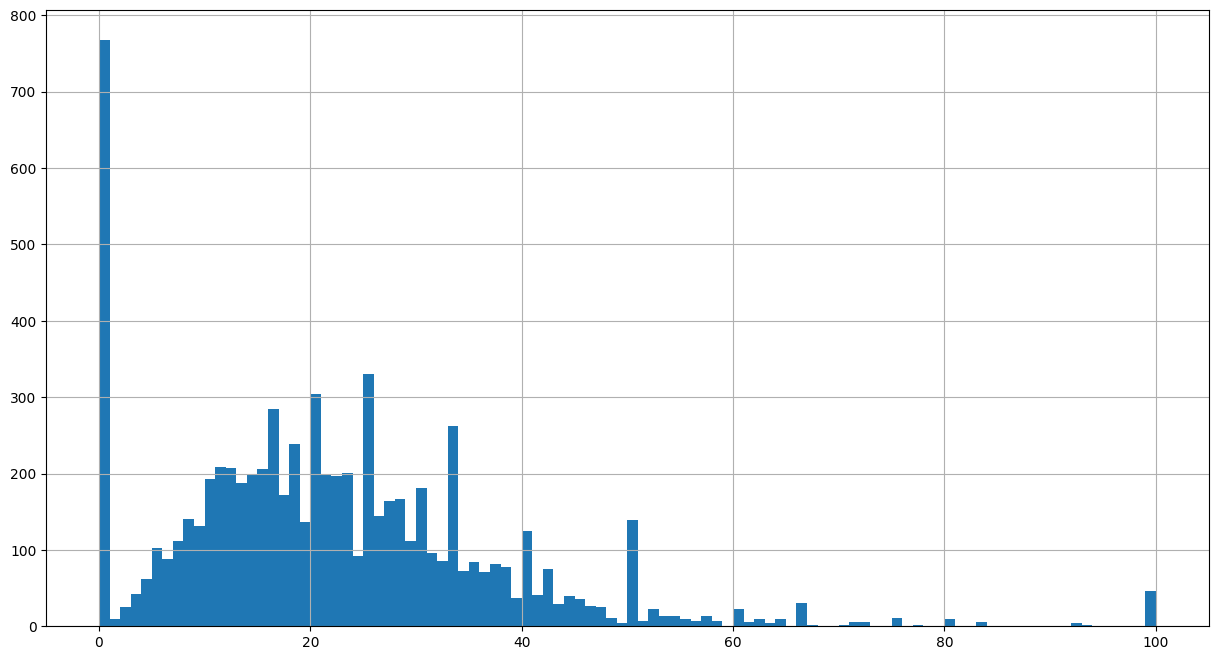

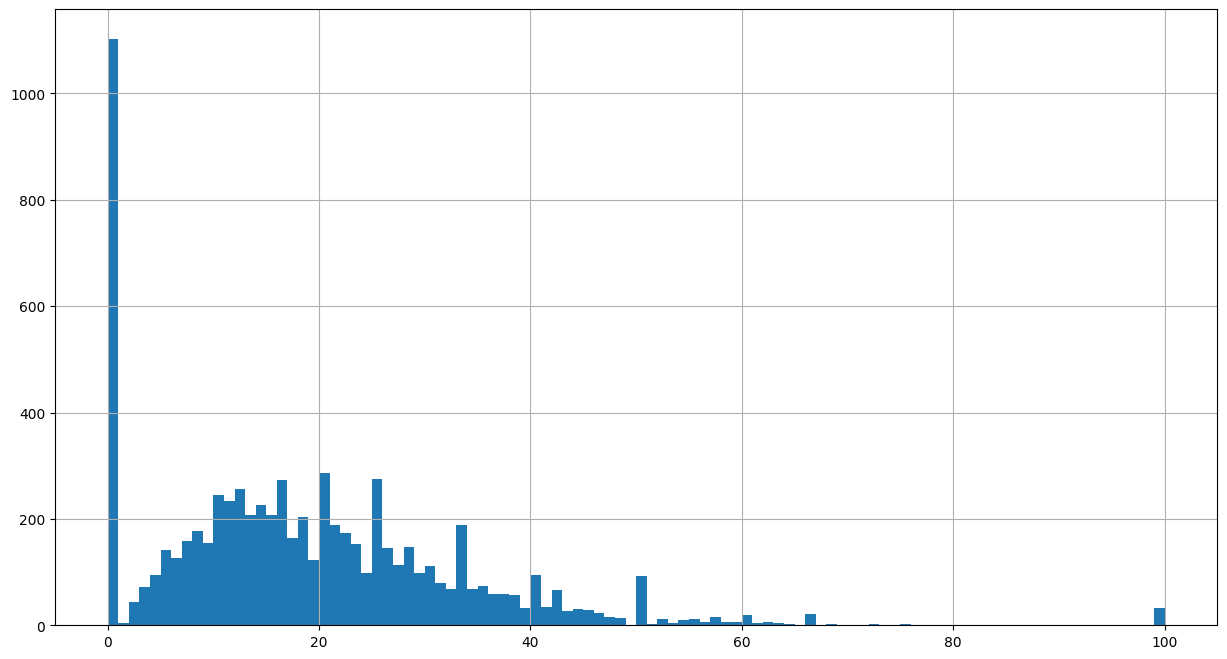

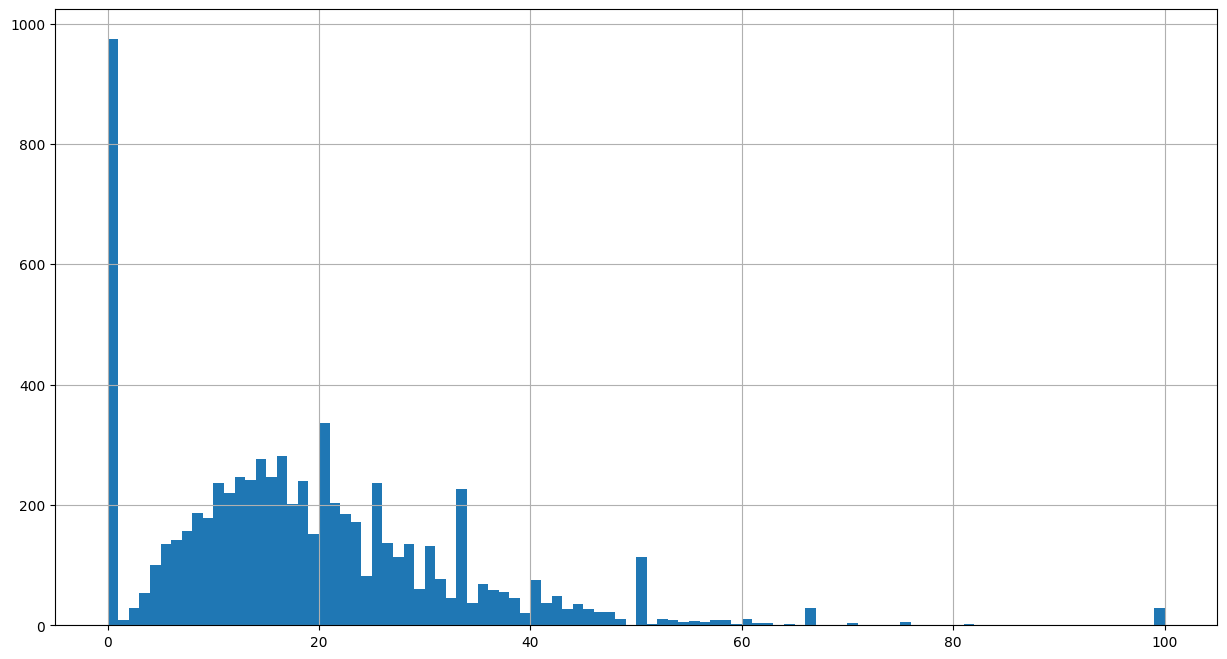

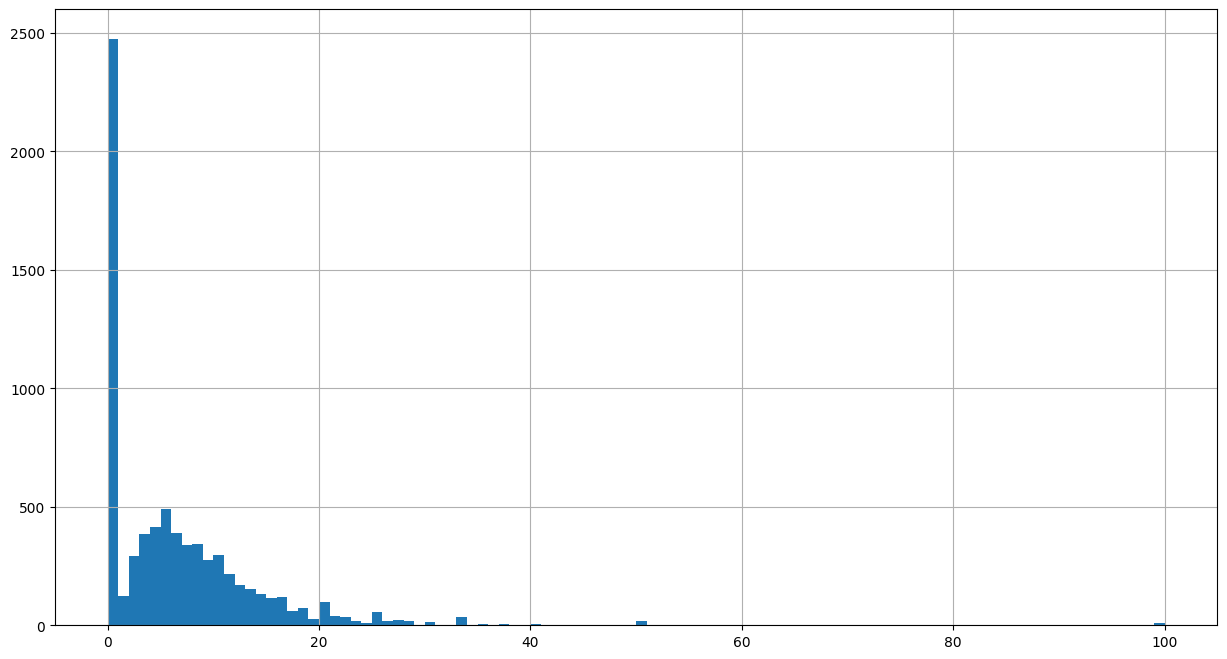

In [7]:
df['Prct retard pour causes externes'].hist(bins = 100);
plt.show()
df['Prct retard pour cause infrastructure'].hist(bins = 100);
plt.show()
df['Prct retard pour cause gestion trafic'].hist(bins = 100);
plt.show()
df['Prct retard pour cause matériel roulant'].hist(bins = 100);
plt.show()
df['Prct retard pour cause gestion en gare et réutilisation de matériel'].hist(bins = 100);
plt.show()
df['Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)'].hist(bins = 100);
plt.show()

Concernant les pourcentages de cause de retard, nous remarquons une **répartition plus diffuse et beaucoup plus large**, avec un pique à 0% puis une distribution suivant globalement le même schéma rappelant celui d'une loi normale plus ou moins équilibré.

## Questions du domaine

Afin de faciliter la manipulation des données, nous allons **renommer nos variables** de telle sorte à éviter les espaces et caractères spéciaux. 

In [9]:
df.rename(columns = {'Date':'Date',
'Service':'Service',
'Gare de départ':'Gare_depart',
'Gare d\'arrivée':'Gare_arrivee',
'Durée moyenne du trajet':'Duree_moyenne_trajet',
'Nombre de circulations prévues':'Nombre_circulations_prevues',
'Nombre de trains annulés':'Nombre_trains_annules',
'Nombre de trains en retard au départ':'Nombre_trains_retard_depart',
'Retard moyen des trains en retard au départ':'Retard_moyen_trains_depart',
'Retard moyen de tous les trains au départ':'Retard_moyen_tous_trains_depart',
'Nombre de trains en retard à l\'arrivée':'Nombre_trains_retard_arrivee',
'Retard moyen des trains en retard à l\'arrivée':'Retard_moyen_trains_arrivee',
'Retard moyen de tous les trains à l\'arrivée':'Retard_moyen_tous_trains_arrivee',
'Nombre trains en retard > 15min':'Nombre_trains_retard_sup15min',
'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)':'Retard_moyen_trains_retard_sup15min_si_liaison',
'Nombre trains en retard > 30min':'Nombre_trains_retard_sup30min',
'Nombre trains en retard > 60min':'Nombre_trains_retard_sup30min',
'Prct retard pour causes externes':'Prct_retard_causes_externes',
'Prct retard pour cause infrastructure':'Prct_retard_cause_infrastructure',
'Prct retard pour cause gestion trafic':'Prct_retard_cause_gestion_trafic',
'Prct retard pour cause matériel roulant':'Prct_retard_cause_matériel_roulant',
'Prct retard pour cause gestion en gare et réutilisation de matériel':'Prct_retard_cause_gestion_gare',
'Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)':'Prct_retard_cause_voyageurs'}, inplace = True)

In [169]:
df.nunique()

Date                                                59
Service                                              2
Gare_depart                                         59
Gare_arrivee                                        59
Duree_moyenne_trajet                               385
Nombre_circulations_prevues                        774
Nombre_trains_annules                              181
Nombre_trains_retard_depart                        442
Retard_moyen_trains_depart                        7019
Retard_moyen_tous_trains_depart                   7168
Nombre_trains_retard_arrivee                       185
Retard_moyen_trains_arrivee                       6986
Retard_moyen_tous_trains_arrivee                  7169
Nombre_trains_retard_sup15min                      142
Retard_moyen_trains_retard_sup15min_si_liaison    6961
Nombre_trains_retard_sup30min                       85
Nombre_trains_retard_sup30min                       40
Prct_retard_causes_externes                       1568
Prct_retar

Nos variables ont bien été renommées. 

### <span style="color:darkblue">Interessons nous dans un premier temps au trafic global des trains et leurs perturbations éventuelles depuis 2018</span>

### Sur quel axe compte-t-on globalement le plus de retard à l'arrivée ? le moins de retard ?

Nous regroupons dans un dataframe les axes grâce à un `groupby()` sur les gares de départ et d'arrivée, et nous effecutons une moyenne des trains arrivés en retard grâce à un `mean()`.
Afin de savoir quel est la lisaison qui a compté le plus et le moins de retard, nous effectuons un `sort_values()` pour trier le nombre de trains en retard par ordre décroissant.

In [10]:
df.groupby(['Gare_depart', 'Gare_arrivee']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False)


/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/688599606.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gare_depart', 'Gare_arrivee']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False)


retards_arrivee
Gare_depart          Gare_arrivee                         
BORDEAUX ST JEAN     PARIS MONTPARNASSE         118.559322
RENNES               PARIS MONTPARNASSE          97.728814
LILLE                PARIS NORD                  85.898305
LYON PART DIEU       MARSEILLE ST CHARLES        84.440678
LE MANS              PARIS MONTPARNASSE          82.067797
...                                                    ...
PARIS VAUGIRARD      RENNES                       2.916667
BORDEAUX ST JEAN     TOURCOING                    2.807018
TOURCOING            MARSEILLE ST CHARLES         2.307692
RENNES               PARIS VAUGIRARD              2.250000
MARSEILLE ST CHARLES MADRID                       1.772727

[130 rows x 1 columns]

Nous voyons que c'est sur l'axe **Bordeaux St Jean - Paris Montparnasse** que l'on a compté **le plus de retards** à l'arrivée entre janvier 2018 et novembre 2022. En revanche, c'est l'axe **Marseille St Charles - Madrid** qui a compté **le moins de retards** à l'arrivée.

### Et concernant les gares... ? 

En suivant cette la même logique que précedemment, nous faisons en sorte de présenter cette fois-ci les données sous la forme d'un barplot que nous trions par ordre décroissant afin de savoir quelles gares de départ et d'arrivées sont le plus concernées par les retards. 

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/3974345754.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gare_depart']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False).plot.bar(y = 'retards_arrivee', figsize = (15,5),title ='Nombes de trains en retard à leur arrivée selon la gare de départ')


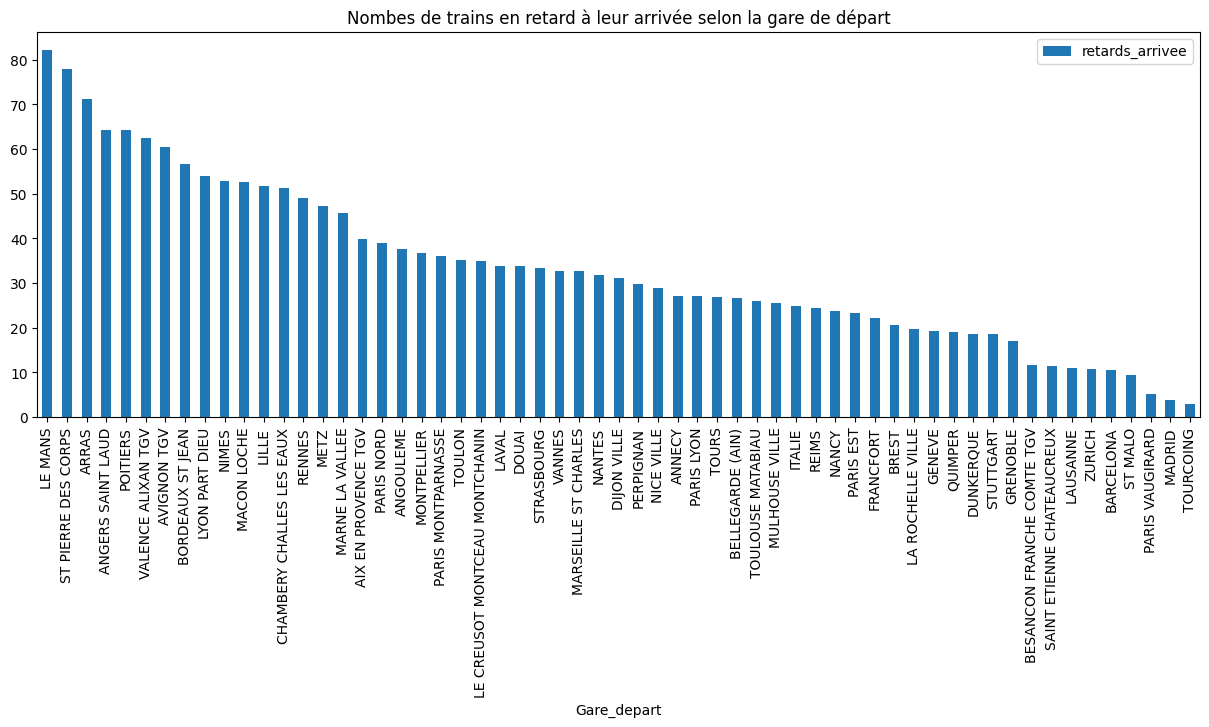

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/3974345754.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gare_arrivee']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False).plot.bar(y = 'retards_arrivee', figsize = (15,5),title ='Nombes de trains en retard à leur arrivée selon la gare d\'arrivée')


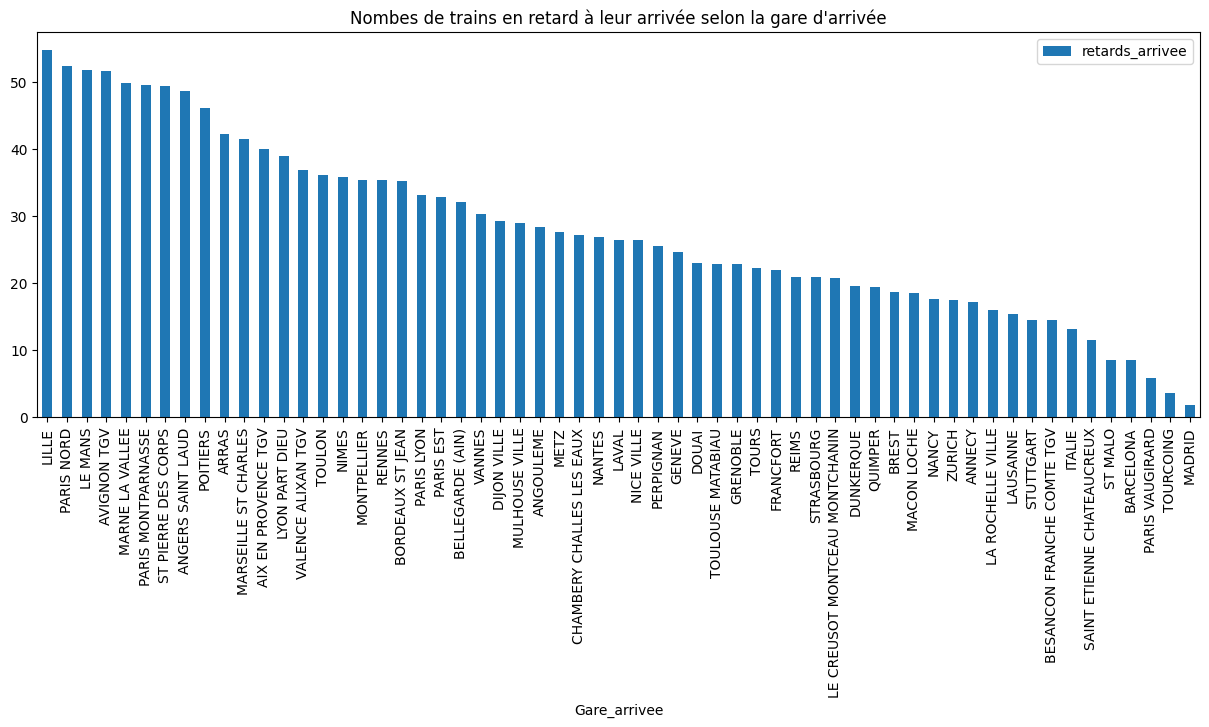

In [11]:
df.groupby(['Gare_depart']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False).plot.bar(y = 'retards_arrivee', figsize = (15,5),title ='Nombes de trains en retard à leur arrivée selon la gare de départ')
plt.show()
df.groupby(['Gare_arrivee']).mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee').sort_values(by = 'retards_arrivee', ascending = False).plot.bar(y = 'retards_arrivee', figsize = (15,5),title ='Nombes de trains en retard à leur arrivée selon la gare d\'arrivée')
plt.show()

Nous voyons ici que ce sont les trains qui partent de la **gare du Mans** qui sont **le plus concernés par des retards à leur arrivée**. En revanche, ceux qui partent de **Tourcoing ou Madrid** sont **moins concernés** par le retard. 


Nous remarquons également que ce sont les trains à destinations de **Lille** qui sont **le plus concernées par des retards à leur arrivée**. Les trains à destination du Mans sont en 3ème position parmi ceux les plus concernées par le retard. En revanche, ceux à destination de **Tourcoing ou de Madrid** sont une nouvelle fois **moins concernés** par le retard. 



### Représenter l'évolution des retards des trains à leur arrivée dans le temps depuis 2018. Que peut-on en dire ? Des périodes sont-elles plus propices aux retards des trains ? 

Afin de pouvoir effectuer une représentation globale des trains en retard à leur arrivée depuis 2018, nous allons faire un `groupby()` pour regrouper les différentes dates disponibles dans notre jeu de données et nous effecutons une moyenne du nombre de trains en retard pour ces dates grâce à un `mean()`. Nous obtiendrons ainsi un dataframe avec tous les mois depuis 2018.

In [12]:
dfretardglobal = df.groupby('Date').mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee')
dfretardglobal

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/2747633125.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfretardglobal = df.groupby('Date').mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee')


retards_arrivee
Date                    
2018-01        40.600000
2018-02        53.392308
2018-03        40.276923
2018-04        31.276923
2018-05        36.369231
2018-06        49.938462
2018-07        68.553846
2018-08        43.769231
2018-09        38.092308
2018-10        40.384615
2018-11        43.792308
2018-12        38.161538
2019-01        41.869919
2019-02        29.788618
2019-03        32.504065
2019-04        28.626016
2019-05        28.162602
2019-06        44.040650
2019-07        44.829268
2019-08        33.016260
2019-09        30.317073
2019-10        43.317073
2019-11        39.308943
2019-12        18.951220
2020-01        30.894309
2020-02        31.878049
2020-03        24.902439
2020-04         4.528455
2020-05         7.886179
2020-06        15.487805
2020-07        28.585366
2020-08        28.317073
2020-09        25.024390
2020-10        28.211382
2020-11         9.146341
2020-12        17.813008
2021-01        30.140496
2021-02        24.413223
2021-03        14.966942
2021-04         9.983051
2021-05        22.785124
2021-06        31.115702
2021-07        34.090909
2021-08        28.520661
2021-09        31.545455
2021-10        36.983471
2021-11        40.950413
2021-12        36.413223
2022-01        26.628099
2022-02        22.380165
2022-03        32.603306
2022-04        40.910569
2022-05        39.430894
2022-06        56.528926
2022-07        74.203252
2022-08        53.096774
2022-09        35.008130
2022-10        43.317073
2022-11        36.933884

Une fois ce dataframe obtenu, nous pouvons en faire une représentation graphique grâce à un `plot()`.

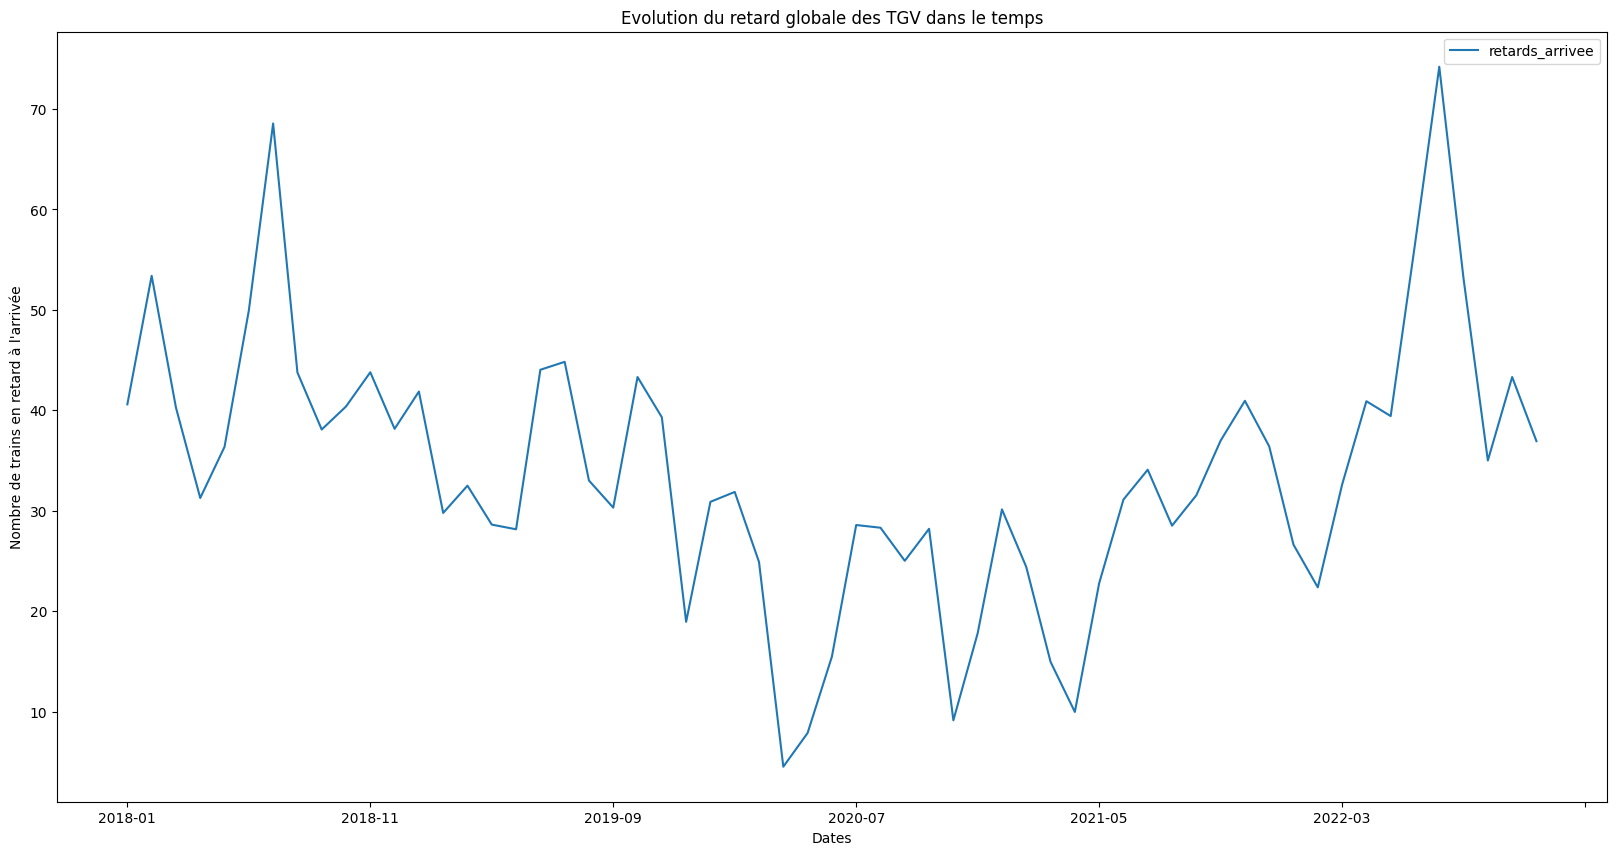

In [13]:
dfretardglobal.plot(title = 'Evolution du retard globale des TGV dans le temps', xlabel='Dates', ylabel = 'Nombre de trains en retard à l\'arrivée',figsize = (20,10));

Nous remarquons que globalement, entre janvier 2018 et novembre 2022, **deux "piques" de retard** ressortent particulièrement : celui de la période de **juillet 2018** et de **juillet 2022**. Nous remarquons également que **tous les étés, une hausse des retards à l'arrivée est à noter**. Cela peut s'expliquer notamment par le fait que les **périodes de vacances estivales** engendrent beaucoup d'affluences et que les trains sont plus nombreux à circuler.


En revanche, pour toutes les années depuis 2018, nous observons une **baisse des retards durant la période de février à mars** (ce sont des périodes où l'affluence est en général moins importante).

### Même question en choissant une liaison de gare en particulier sur l'année 2018. L'évolution des retards des trains à leur arrivée sur cet axe suit-il la tendance principale ? Que peut-on en dire ?

Dans un premier temps, nous allons récupérer les données uniquement de 2018 que nous allons transformer en un nouveau dataframe.

In [14]:
df2018 = df[df['Date'] <= '2018-12']
df2018

Date        Service                 Gare_depart         Gare_arrivee  \
0     2018-01       National            BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1     2018-01       National           LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2     2018-01       National          PARIS MONTPARNASSE              QUIMPER   
3     2018-01       National          PARIS MONTPARNASSE              ST MALO   
4     2018-01       National          PARIS MONTPARNASSE  ST PIERRE DES CORPS   
...       ...            ...                         ...                  ...   
1555  2018-12       National  SAINT ETIENNE CHATEAUCREUX           PARIS LYON   
1556  2018-12       National                  PARIS LYON   VALENCE ALIXAN TGV   
1557  2018-12       National        MARSEILLE ST CHARLES       LYON PART DIEU   
1558  2018-12  International                  PARIS LYON               GENEVE   
1559  2018-12  International                  PARIS LYON               ITALIE   

      Duree_moyenne_trajet  Nombre_circulations_prevues  \
0                      141                          870   
1                      165                          222   
2                      220                          248   
3                      156                          102   
4                       61                          391   
...                    ...                          ...   
1555                   168                          117   
1556                   131                          282   
1557                   104                          432   
1558                   190                          199   
1559                   418                           95   

      Nombre_trains_annules  Nombre_trains_retard_depart  \
0                         5                          289   
1                         0                            8   
2                         1                           37   
3                         0                           12   
4                         2                           61   
...                     ...                          ...   
1555                      0                           15   
1556                      4                           54   
1557                     11                          114   
1558                      2                           42   
1559                      1                           20   

      Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
0                      11.247809                         3.693179  ...   
1                       2.875000                         0.095796  ...   
2                       9.501351                         1.003981  ...   
3                      19.912500                         1.966667  ...   
4                       7.796995                         0.886889  ...   
...                          ...                              ...  ...   
1555                    6.946667                         0.892165  ...   
1556                   12.684259                         2.118106  ...   
1557                    5.567105                         1.524584  ...   
1558                   14.970635                         2.964721  ...   
1559                   19.444167                         3.889716  ...   

      Nombre_trains_retard_sup15min  \
0                               110   
1                                22   
2                                26   
3                                 8   
4                                17   
...                             ...   
1555                              9   
1556                             17   
1557                             36   
1558                             28   
1559                             15   

      Retard_moyen_trains_retard_sup15min_si_liaison  \
0                                           6.511118   
1                                           5.696096   
2                                           7.548387   
3                       

Puis de la même façon que la question précédente, nous allons faire un  `groupby()` pour regrouper les dates et nous effecutons une moyenne du nombre de trains en retard pour ces dates grâce à un `mean()`.

In [15]:
dfretard2018 = df2018.groupby('Date').mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee2018')
dfretard2018

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/3592635348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfretard2018 = df2018.groupby('Date').mean().Nombre_trains_retard_arrivee.to_frame('retards_arrivee2018')


retards_arrivee2018
Date                        
2018-01            40.600000
2018-02            53.392308
2018-03            40.276923
2018-04            31.276923
2018-05            36.369231
2018-06            49.938462
2018-07            68.553846
2018-08            43.769231
2018-09            38.092308
2018-10            40.384615
2018-11            43.792308
2018-12            38.161538

Ensuite, nous récupérons dans un nouveau dataframe les lignes concernant l'axe qui nous intéresse en particulier : prenons l'exemple de l'axe Paris (gare de Lyon) - Dijon Ville. Nous effectuons cela grâce à un `query()`.

In [16]:
df2018parisdijon = df2018.query('Gare_depart == "PARIS LYON"').query('Gare_arrivee == "DIJON VILLE"')
df2018parisdijon

Date   Service Gare_depart Gare_arrivee  Duree_moyenne_trajet  \
99    2018-01  National  PARIS LYON  DIJON VILLE                    96   
251   2018-02  National  PARIS LYON  DIJON VILLE                    99   
280   2018-03  National  PARIS LYON  DIJON VILLE                    98   
444   2018-04  National  PARIS LYON  DIJON VILLE                    96   
541   2018-05  National  PARIS LYON  DIJON VILLE                    97   
768   2018-06  National  PARIS LYON  DIJON VILLE                    96   
856   2018-07  National  PARIS LYON  DIJON VILLE                    96   
953   2018-08  National  PARIS LYON  DIJON VILLE                    96   
1080  2018-09  National  PARIS LYON  DIJON VILLE                    97   
1288  2018-10  National  PARIS LYON  DIJON VILLE                    96   
1337  2018-11  National  PARIS LYON  DIJON VILLE                    95   
1447  2018-12  National  PARIS LYON  DIJON VILLE                    96   

      Nombre_circulations_prevues  Nombre_trains_annules  \
99                            468                      6   
251                           430                      2   
280                           443                     11   
444                           441                    150   
541                           435                     96   
768                           442                     47   
856                           446                     16   
953                           435                     15   
1080                          424                      3   
1288                          403                      3   
1337                          453                      6   
1447                          453                      3   

      Nombre_trains_retard_depart  Retard_moyen_trains_depart  \
99                             62                   11.569355   
251                            58                   13.925287   
280                            63                   12.326190   
444                            43                   14.155426   
541                            39                   20.814957   
768                            42                   29.535714   
856                           107                   19.688162   
953                            92                   17.463043   
1080                           79                   12.976582   
1288                           58                   20.072126   
1337                           71                   19.040141   
1447                           63                   15.478571   

      Retard_moyen_tous_trains_depart  ...  Nombre_trains_retard_sup15min  \
99                           1.227525  ...                             32   
251                          1.577726  ...                             12   
280                          1.480170  ...                             20   
444                          1.763345  ...                             17   
541                          2.375664  ...                             26   
768                          3.156667  ...                             31   
856                          4.692093  ...                             61   
953                          3.557738  ...                             44   
1080                         2.199446  ...                             36   
1288                         2.640292  ...                             34   
1337                         2.691573  ...                             43   
1447                         1.859185  ...                             23   

      Retard_moyen_trains_retard_sup15min_si_liaison  \
99                                          3.146212   
251                                         2.527181   
280                                         1.552431   
444                                         2.968843   
541                                         3.562979   
768                                         4.468861   
856                      

Nous pouvons maintenant représenter visuellement grâce à un `plot()` nos 2 dataframes sur le même graphique afin de les comparer. 

Pour ça, il faut faire une jointure naturelle de nos 2 tableau sur la variable date. 

In [17]:
dfretard2018 = dfretard2018.merge(df2018parisdijon, on='Date', how = 'inner')
dfretard2018

Date  retards_arrivee2018   Service Gare_depart Gare_arrivee  \
0   2018-01            40.600000  National  PARIS LYON  DIJON VILLE   
1   2018-02            53.392308  National  PARIS LYON  DIJON VILLE   
2   2018-03            40.276923  National  PARIS LYON  DIJON VILLE   
3   2018-04            31.276923  National  PARIS LYON  DIJON VILLE   
4   2018-05            36.369231  National  PARIS LYON  DIJON VILLE   
5   2018-06            49.938462  National  PARIS LYON  DIJON VILLE   
6   2018-07            68.553846  National  PARIS LYON  DIJON VILLE   
7   2018-08            43.769231  National  PARIS LYON  DIJON VILLE   
8   2018-09            38.092308  National  PARIS LYON  DIJON VILLE   
9   2018-10            40.384615  National  PARIS LYON  DIJON VILLE   
10  2018-11            43.792308  National  PARIS LYON  DIJON VILLE   
11  2018-12            38.161538  National  PARIS LYON  DIJON VILLE   

    Duree_moyenne_trajet  Nombre_circulations_prevues  Nombre_trains_annules  \
0                     96                          468                      6   
1                     99                          430                      2   
2                     98                          443                     11   
3                     96                          441                    150   
4                     97                          435                     96   
5                     96                          442                     47   
6                     96                          446                     16   
7                     96                          435                     15   
8                     97                          424                      3   
9                     96                          403                      3   
10                    95                          453                      6   
11                    96                          453                      3   

    Nombre_trains_retard_depart  Retard_moyen_trains_depart  ...  \
0                            62                   11.569355  ...   
1                            58                   13.925287  ...   
2                            63                   12.326190  ...   
3                            43                   14.155426  ...   
4                            39                   20.814957  ...   
5                            42                   29.535714  ...   
6                           107                   19.688162  ...   
7                            92                   17.463043  ...   
8                            79                   12.976582  ...   
9                            58                   20.072126  ...   
10                           71                   19.040141  ...   
11                           63                   15.478571  ...   

    Nombre_trains_retard_sup15min  \
0                              32   
1                              12   
2                              20   
3                              17   
4                              26   
5                              31   
6                              61   
7                              44   
8                              36   
9                              34   
10                             43   
11                             23   

    Retard_moyen_trains_retard_sup15min_si_liaison  \
0                                         3.146212   
1                                         2.527181   
2                                         1.552431   
3                                         2.968843   
4                                         3.562979   
5                                         4.468861   
6                                         7.706202   
7                                         4.292341   
8                                         3.041330   
9                                         4.706542   
10                                        5.325876   
11                         

In [18]:
dfretard2018.set_index('Date')

retards_arrivee2018   Service Gare_depart Gare_arrivee  \
Date                                                              
2018-01            40.600000  National  PARIS LYON  DIJON VILLE   
2018-02            53.392308  National  PARIS LYON  DIJON VILLE   
2018-03            40.276923  National  PARIS LYON  DIJON VILLE   
2018-04            31.276923  National  PARIS LYON  DIJON VILLE   
2018-05            36.369231  National  PARIS LYON  DIJON VILLE   
2018-06            49.938462  National  PARIS LYON  DIJON VILLE   
2018-07            68.553846  National  PARIS LYON  DIJON VILLE   
2018-08            43.769231  National  PARIS LYON  DIJON VILLE   
2018-09            38.092308  National  PARIS LYON  DIJON VILLE   
2018-10            40.384615  National  PARIS LYON  DIJON VILLE   
2018-11            43.792308  National  PARIS LYON  DIJON VILLE   
2018-12            38.161538  National  PARIS LYON  DIJON VILLE   

         Duree_moyenne_trajet  Nombre_circulations_prevues  \
Date                                                         
2018-01                    96                          468   
2018-02                    99                          430   
2018-03                    98                          443   
2018-04                    96                          441   
2018-05                    97                          435   
2018-06                    96                          442   
2018-07                    96                          446   
2018-08                    96                          435   
2018-09                    97                          424   
2018-10                    96                          403   
2018-11                    95                          453   
2018-12                    96                          453   

         Nombre_trains_annules  Nombre_trains_retard_depart  \
Date                                                          
2018-01                      6                           62   
2018-02                      2                           58   
2018-03                     11                           63   
2018-04                    150                           43   
2018-05                     96                           39   
2018-06                     47                           42   
2018-07                     16                          107   
2018-08                     15                           92   
2018-09                      3                           79   
2018-10                      3                           58   
2018-11                      6                           71   
2018-12                      3                           63   

         Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
Date                                                                  ...   
2018-01                   11.569355                         1.227525  ...   
2018-02                   13.925287                         1.577726  ...   
2018-03                   12.326190                         1.480170  ...   
2018-04                   14.155426                         1.763345  ...   
2018-05                   20.814957                         2.375664  ...   
2018-06                   29.535714                         3.156667  ...   
2018-07                   19.688162                         4.692093  ...   
2018-08                   17.463043                         3.557738  ...   
2018-09                   12.976582                         2.199446  ...   
2018-10                   20.072126                         2.640292  ...   
2018-11                   19.040141                         2.691573  ...   
2018-12                   15.478571                         1.859185  ...   

         Nombre_trains_retard_sup15min  \
Date                                     
2018-01                             32   
2018-02                             12   
2018-03                             20   
2018-04                      

Une fois notre jointure effectuée, nous pouvons construire nos graphiques.

In [19]:
dfretard2018.plot(x='Date', y= ['retards_arrivee2018', 'Nombre_trains_retard_arrivee']);
plt.title("Evolution globale du retard des TGV en 2018, et sur l'axe Paris Lyon - Dijon Ville");
plt.xlabel("Date");
plt.ylabel("Nombre moyen de trains en retard");

In [ ]:
#comment changer légende des étiquettes en haut à droite ??

Si l'on remarque que pour le **début de l'année 2018**, les trains de **l'axe Paris-Dijon** étaient bien **moins concernés par le retard** à l'arrivée que la moyenne globale en France, il semble que le **reste de l'année suive la tendance globale**. Nous remarquons même un **nombre plus important de trains en retard** pour l'axe Paris-Dijon que la moyenne globale en France **à partir d'août** et jusqu'à la fin de l'année.

### Les périodes de grèves entrainent-elles des conséquences plus importantes sur les annulations des trains ? 

Pour répondre à cette question, nous allons dans un premier temps faire un `groupby()` pour regrouper les différentes dates disponibles dans notre jeu de données et nous effecutons une moyenne du nombre de trains annulés pour ces dates grâce à un `mean()`.

In [21]:
dfannulation = df.groupby('Date').mean().Nombre_trains_annules.to_frame('annulations')
dfannulation

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/3363332312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfannulation = df.groupby('Date').mean().Nombre_trains_annules.to_frame('annulations')


annulations
Date                
2018-01     2.046154
2018-02     5.638462
2018-03     7.146154
2018-04    91.084615
2018-05    68.153846
2018-06    42.130769
2018-07    14.938462
2018-08     3.007692
2018-09     1.246154
2018-10     2.415385
2018-11     2.861538
2018-12     2.407692
2019-01     3.910569
2019-02     3.056911
2019-03     2.780488
2019-04     2.016260
2019-05     5.300813
2019-06     9.211382
2019-07    13.699187
2019-08     3.967480
2019-09     2.455285
2019-10     8.373984
2019-11     5.772358
2019-12    20.390244
2020-01    12.170732
2020-02     2.837398
2020-03    16.121951
2020-04    16.504065
2020-05    16.544715
2020-06    10.845528
2020-07     4.902439
2020-08     2.373984
2020-09     1.601626
2020-10     2.951220
2020-11    12.642276
2020-12    12.325203
2021-01     1.181818
2021-02     1.942149
2021-03     7.851240
2021-04    98.398305
2021-05    15.413223
2021-06     0.338843
2021-07     2.016529
2021-08     0.421488
2021-09     2.272727
2021-10     3.231405
2021-11     0.652893
2021-12     5.239669
2022-01     4.595041
2022-02     1.925620
2022-03     2.057851
2022-04     0.772358
2022-05     0.569106
2022-06     1.619835
2022-07     3.365854
2022-08     0.822581
2022-09     2.422764
2022-10     2.357724
2022-11     0.495868

Nous effectuons ensuite une représentation graphique de l'évolution des annulations selon les périodes grâce à un `plot()`.

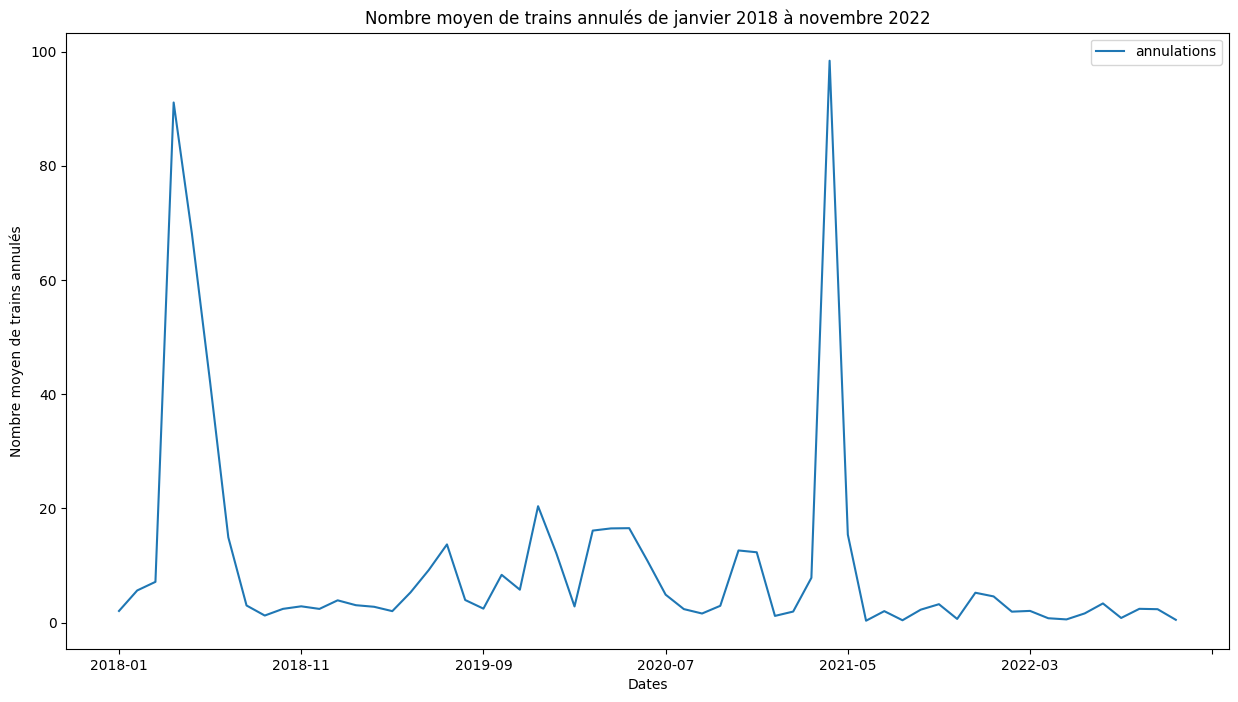

In [22]:
dfannulation.plot(title = "Nombre moyen de trains annulés de janvier 2018 à novembre 2022", xlabel = "Dates", ylabel="Nombre moyen de trains annulés");


Nous remarquons une **hausse flagrante** des annulations des trains en **avril 2018** et en **avril 2021**. Avril 2018 correspond effectivemnt à une période marquée par des mouvements sociaux.


En revanche, si nous nous attendions à un résultat similaire pour les périodes de **grève de fin 2019 - début 2020**, même si nous remarquons une **légère hausse de trains annulés** sur cette période, elle reste nettement moins importante que celle de 2018.

### <span style="color:darkblue">Maintenant que nous nous sommes intéressé au trafic global des trains et leurs perturbations éventuelles depuis 2018, il pourrait être interessant de nous focaliser sur une période beaucoup plus récente : novembre 2022.</span>


### Sur quel axe les retards ont-ils été les plus longs en novembre 2022 ?

Récuperons dans un premier temps les données que de novembre 2022.

In [23]:
dfnov2022 = df[df['Date'] == '2022-11']
dfnov2022

Date        Service           Gare_depart          Gare_arrivee  \
7184  2022-11  International                MADRID  MARSEILLE ST CHARLES   
7185  2022-11  International  MARSEILLE ST CHARLES                MADRID   
7186  2022-11  International             PARIS EST             FRANCFORT   
7187  2022-11  International            PARIS LYON             BARCELONA   
7188  2022-11       National             ANGOULEME    PARIS MONTPARNASSE   
...       ...            ...                   ...                   ...   
7300  2022-11       National    PARIS MONTPARNASSE                 BREST   
7301  2022-11       National    PARIS MONTPARNASSE     TOULOUSE MATABIAU   
7302  2022-11       National    PARIS MONTPARNASSE                VANNES   
7303  2022-11       National            PARIS NORD                 LILLE   
7304  2022-11       National   ST PIERRE DES CORPS    PARIS MONTPARNASSE   

      Duree_moyenne_trajet  Nombre_circulations_prevues  \
7184                   481                           29   
7185                   463                           28   
7186                   227                          166   
7187                   400                           29   
7188                   132                          325   
...                    ...                          ...   
7300                   226                          247   
7301                   263                          199   
7302                   152                          242   
7303                    66                          585   
7304                    68                          517   

      Nombre_trains_annules  Nombre_trains_retard_depart  \
7184                      0                            0   
7185                      0                            5   
7186                      5                           25   
7187                      0                            5   
7188                      0                          197   
...                     ...                          ...   
7300                      1                           34   
7301                      0                           21   
7302                      0                           33   
7303                      5                           52   
7304                      1                          211   

      Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
7184                    0.000000                         0.000000  ...   
7185                    4.090000                         0.914286  ...   
7186                   17.250667                         2.726915  ...   
7187                   19.416667                         2.967241  ...   
7188                    7.814975                         4.773395  ...   
...                          ...                              ...  ...   
7300                   13.799510                         1.462060  ...   
7301                    9.157143                         0.477303  ...   
7302                   15.357576                         1.651722  ...   
7303                   18.957692                         1.392820  ...   
7304                    6.457899                         2.765342  ...   

      Nombre_trains_retard_sup15min  \
7184                              5   
7185                              0   
7186                             35   
7187                              4   
7188                             40   
...                             ...   
7300                             34   
7301                             17   
7302                             34   
7303                             34   
7304                             34   

      Retard_moyen_trains_retard_sup15min_si_liaison  \
7184                                       49.923333   
7185                                        0.000000   
7186                                       33.458095   
7187                                       42.250000   
7188                        

Nous regroupons ensuite dans un dataframe les différents axes de liaisons pour novembre 2022 grâce à un `groupby()` sur les gares de départ et d'arrivée, et nous effecutons une moyenne du temps de retard des trains arrivés en retard grâce à un `mean()`.

In [24]:
dftempsretard2022 = dfnov2022.groupby(['Gare_depart', 'Gare_arrivee']).mean().Retard_moyen_trains_arrivee.to_frame('temps_retards')
dftempsretard2022

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/4146042878.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftempsretard2022 = dfnov2022.groupby(['Gare_depart', 'Gare_arrivee']).mean().Retard_moyen_trains_arrivee.to_frame('temps_retards')


temps_retards
Gare_depart         Gare_arrivee                     
AIX EN PROVENCE TGV PARIS LYON              37.280719
ANGERS SAINT LAUD   PARIS MONTPARNASSE      28.109195
ANGOULEME           PARIS MONTPARNASSE      33.309295
ANNECY              PARIS LYON               0.000000
ARRAS               PARIS NORD              21.036694
...                                               ...
TOULOUSE MATABIAU   PARIS MONTPARNASSE      47.270556
TOURS               PARIS MONTPARNASSE      16.276563
VALENCE ALIXAN TGV  PARIS LYON              36.232587
VANNES              PARIS MONTPARNASSE      25.731915
ZURICH              PARIS LYON              47.828704

[121 rows x 1 columns]

Afin de savoir quel est la liaison qui a compté les retards les plus longs, nous effectuons un `sort_values()`. Il peut être aussi intéréssant de regarder au delà du premier axe touché par des perturbations longues, nous choisonns alors de visualiser les 5 premiers concernés grâce à la fonction `head()`. 

In [25]:
dfretardtop = dftempsretard2022.sort_values(by = 'temps_retards', ascending = False).head(5)
dfretardtop

temps_retards
Gare_depart Gare_arrivee               
STRASBOURG  NANTES            65.127778
BARCELONA   PARIS LYON        55.155556
PARIS LYON  NICE VILLE        53.372222
            PERPIGNAN         50.607843
            MONTPELLIER       50.271111

Enfin, nous effectuons un barplot afin d'en faire une visualisation. 

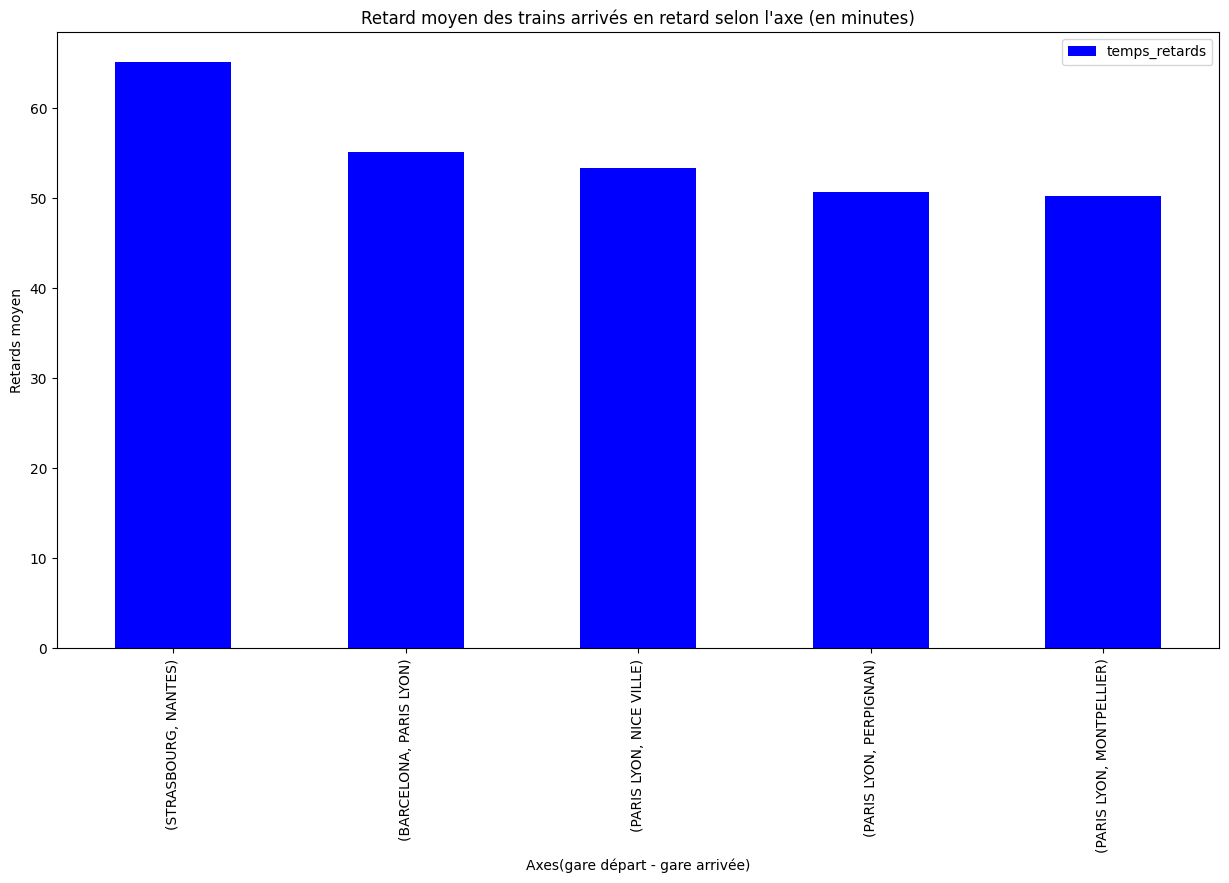

In [29]:
dfretardtop.plot.bar(title = "Retard moyen des trains arrivés en retard selon l'axe (en minutes)", xlabel = "Axes(gare départ - gare arrivée)", ylabel="Retards moyen", color="blue");



Durant le mois de novembre 2022, les retards les plus long des TGV ont concerné la **liaison Strasbourg-Nantes** avec une moyenne de **plus d'une heure de retard** (65,12 min de retard en moyenne) pour les trains arrivés en retard.  Nous remarquons aussi que la **gare de Paris Lyon** a elle aussi subit **beaucoup de pertrubations** ce dernier mois.

### <span style="color:darkblue">Essayons maintenant de nous mettre dans une posture de mise en situation...</span>

### Imaginons qu'une personne au départ de Paris Montparnasse en janvier 2020 souhaite prendre un train. Cette personne souhaite à tout prix éviter les perturbations sur son trajets (retards, annulations), quelle est la meilleure destination pour sa requête ?

Récupérons dans un premier temps les données de la période concernée.

In [30]:
dfjanv2020 = df[df['Date'] == '2020-01']
dfjanv2020

Date        Service           Gare_depart        Gare_arrivee  \
3036  2020-01       National     ANGERS SAINT LAUD  PARIS MONTPARNASSE   
3037  2020-01       National      BORDEAUX ST JEAN  PARIS MONTPARNASSE   
3038  2020-01       National                NANTES  PARIS MONTPARNASSE   
3039  2020-01       National    PARIS MONTPARNASSE            POITIERS   
3040  2020-01       National               ST MALO  PARIS MONTPARNASSE   
...       ...            ...                   ...                 ...   
3154  2020-01       National            PARIS LYON              TOULON   
3155  2020-01       National                TOULON          PARIS LYON   
3156  2020-01  International            PARIS LYON              GENEVE   
3157  2020-01  International  MARSEILLE ST CHARLES              MADRID   
3158  2020-01  International            PARIS LYON           BARCELONA   

      Duree_moyenne_trajet  Nombre_circulations_prevues  \
3036                    99                          369   
3037                   143                          660   
3038                   139                          443   
3039                    93                          389   
3040                   157                           69   
...                    ...                          ...   
3154                   246                          162   
3155                   247                          159   
3156                   188                          169   
3157                   322                           22   
3158                   343                           53   

      Nombre_trains_annules  Nombre_trains_retard_depart  \
3036                     19                          283   
3037                     41                          277   
3038                     23                          213   
3039                     29                          253   
3040                      3                           58   
...                     ...                          ...   
3154                      9                           49   
3155                      7                          141   
3156                      9                           71   
3157                      1                           10   
3158                      2                           26   

      Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
3036                    3.405359                         2.721524  ...   
3037                   11.586703                         4.820759  ...   
3038                   21.624022                        10.719405  ...   
3039                    2.169368                         1.366759  ...   
3040                    3.458046                         3.018939  ...   
...                          ...                              ...  ...   
3154                    7.588095                         2.074074  ...   
3155                    3.453901                         3.192105  ...   
3156                    6.421362                         2.657708  ...   
3157                    4.046667                         1.913492  ...   
3158                    4.261538                         1.916993  ...   

      Nombre_trains_retard_sup15min  \
3036                             27   
3037                             84   
3038                             31   
3039                             20   
3040                              5   
...                             ...   
3154                             26   
3155                             10   
3156                             22   
3157                              3   
3158                              7   

      Retard_moyen_trains_retard_sup15min_si_liaison  \
3036                                       35.287037   
3037                                       40.405020   
3038                                       34.397312   
3039                                       32.588333   
3040                                       35.900000

Ajoutons maintenant une variable supplémentaire qui permette de calculer le nombre de trains n'ayant pas subis de perturbations. Pour cela, nous prenons le nombre de trains prévus à la circulation auquel nous retirons le nombre de trains annulés et ceux étant arrivés en retard.

In [31]:
dfjanv2020["trains_sans_perturbations"] = ((dfjanv2020.Nombre_circulations_prevues-dfjanv2020.Nombre_trains_annules-dfjanv2020.Nombre_trains_retard_arrivee))


/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/427057500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjanv2020["trains_sans_perturbations"] = ((dfjanv2020.Nombre_circulations_prevues-dfjanv2020.Nombre_trains_annules-dfjanv2020.Nombre_trains_retard_arrivee))


Grâce à la variable que nous vons d'ajouter, nous pouvons maintenant calculer le pourcentage de chance de ne pas avoir de perturbation.

In [32]:
dfjanv2020["pcrt_non_perturbation"] = ((dfjanv2020.trains_sans_perturbations*100)/dfjanv2020.Nombre_circulations_prevues)
dfjanv2020

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/3052250909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjanv2020["pcrt_non_perturbation"] = ((dfjanv2020.trains_sans_perturbations*100)/dfjanv2020.Nombre_circulations_prevues)


Date        Service           Gare_depart        Gare_arrivee  \
3036  2020-01       National     ANGERS SAINT LAUD  PARIS MONTPARNASSE   
3037  2020-01       National      BORDEAUX ST JEAN  PARIS MONTPARNASSE   
3038  2020-01       National                NANTES  PARIS MONTPARNASSE   
3039  2020-01       National    PARIS MONTPARNASSE            POITIERS   
3040  2020-01       National               ST MALO  PARIS MONTPARNASSE   
...       ...            ...                   ...                 ...   
3154  2020-01       National            PARIS LYON              TOULON   
3155  2020-01       National                TOULON          PARIS LYON   
3156  2020-01  International            PARIS LYON              GENEVE   
3157  2020-01  International  MARSEILLE ST CHARLES              MADRID   
3158  2020-01  International            PARIS LYON           BARCELONA   

      Duree_moyenne_trajet  Nombre_circulations_prevues  \
3036                    99                          369   
3037                   143                          660   
3038                   139                          443   
3039                    93                          389   
3040                   157                           69   
...                    ...                          ...   
3154                   246                          162   
3155                   247                          159   
3156                   188                          169   
3157                   322                           22   
3158                   343                           53   

      Nombre_trains_annules  Nombre_trains_retard_depart  \
3036                     19                          283   
3037                     41                          277   
3038                     23                          213   
3039                     29                          253   
3040                      3                           58   
...                     ...                          ...   
3154                      9                           49   
3155                      7                          141   
3156                      9                           71   
3157                      1                           10   
3158                      2                           26   

      Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
3036                    3.405359                         2.721524  ...   
3037                   11.586703                         4.820759  ...   
3038                   21.624022                        10.719405  ...   
3039                    2.169368                         1.366759  ...   
3040                    3.458046                         3.018939  ...   
...                          ...                              ...  ...   
3154                    7.588095                         2.074074  ...   
3155                    3.453901                         3.192105  ...   
3156                    6.421362                         2.657708  ...   
3157                    4.046667                         1.913492  ...   
3158                    4.261538                         1.916993  ...   

      Nombre_trains_retard_sup30min  Nombre_trains_retard_sup30min  \
3036                             12                              4   
3037                             28                             10   
3038                             14                              4   
3039                              8                              2   
3040                              2                              1   
...                             ...                            ...   
3154                             12                              2   
3155                              5                              0   
3156                             13                              4   
3157                              2                              0   
3158                           

Maintenant nous n'allons garder que les variables qui nous intéressent, à savoir la gare de départ et d'arrivée (afin d'avoir des axes de liaisons entre 2 gares et donc un trajet complet), ainsi que le pourcetage de chance de ne pas avoir de perturbations sur le train de l'axe en question. 

In [33]:
dfnonperturbe = dfjanv2020.groupby(['Gare_depart', 'Gare_arrivee']).mean().pcrt_non_perturbation.to_frame('non perturbés')
dfnonperturbe

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_37914/878959513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfnonperturbe = dfjanv2020.groupby(['Gare_depart', 'Gare_arrivee']).mean().pcrt_non_perturbation.to_frame('non perturbés')


non perturbés
Gare_depart         Gare_arrivee                     
AIX EN PROVENCE TGV PARIS LYON              90.476190
ANGERS SAINT LAUD   PARIS MONTPARNASSE      82.655827
ANGOULEME           PARIS MONTPARNASSE      75.545852
ANNECY              PARIS LYON              72.115385
ARRAS               PARIS NORD              45.126354
...                                               ...
TOURCOING           BORDEAUX ST JEAN        66.666667
TOURS               PARIS MONTPARNASSE      65.384615
VALENCE ALIXAN TGV  PARIS LYON              76.404494
VANNES              PARIS MONTPARNASSE      78.362573
ZURICH              PARIS LYON              84.146341

[123 rows x 1 columns]

Et nous ne gardons que les gares de départ de Nantes.

In [34]:
dftrajetpossibles = dfnonperturbe.query('Gare_depart == "PARIS MONTPARNASSE"')
dftrajetpossibles.sort_values(by='non perturbés', ascending=False)

non perturbés
Gare_depart        Gare_arrivee                      
PARIS MONTPARNASSE QUIMPER                  87.951807
                   BREST                    87.939698
                   LA ROCHELLE VILLE        85.906040
                   ST MALO                  85.897436
                   ANGERS SAINT LAUD        85.831063
                   NANTES                   84.064665
                   ANGOULEME                83.266932
                   VANNES                   82.894737
                   RENNES                   82.258065
                   LE MANS                  81.472081
                   POITIERS                 80.976864
                   ST PIERRE DES CORPS      78.142077
                   LAVAL                    77.725118
                   TOULOUSE MATABIAU        77.586207
                   TOURS                    75.886525
                   BORDEAUX ST JEAN         68.506494

Si la personne au départ de Paris Montparnasse en janvier 2020 choisi un train pour aller à **Quimper**, elle aura **87,95% de chances de n'avoir aucune perturbation** sur son trajet. C'est le pourcentage le plus élevé parmi les destinations possibles. En revanche, si cette personne choisi de se rendre à Bordeaux St Jean, elle aura 31,5% (100-68,5) de chances de recontrer des perturbations sur son train... C'est la destination qui correspond le moins à sa requête. 

Essayons maintenant de comprendre les causes principales des retard sur cet axe Paris - Bordeaux...

### Quelles ont été les causes principales des retards pour les trains au départ de Paris Montparnasse et à destination de Bordeaux St Jean en janvier 2020 ?

Nous prenons dans un premier temps uniquement la ligne qui correspond à notre recherche en prenant pour gare de départ Montparnasse et gare d'arrivée Bordeaux sur la période de janvier 2020.

In [35]:
dfparisbordeaux = dfjanv2020.query('Gare_depart == "PARIS MONTPARNASSE"').query('Gare_arrivee == "BORDEAUX ST JEAN"')
dfparisbordeaux

Date   Service         Gare_depart      Gare_arrivee  \
3126  2020-01  National  PARIS MONTPARNASSE  BORDEAUX ST JEAN   

      Duree_moyenne_trajet  Nombre_circulations_prevues  \
3126                   147                          616   

      Nombre_trains_annules  Nombre_trains_retard_depart  \
3126                     48                          435   

      Retard_moyen_trains_depart  Retard_moyen_tous_trains_depart  ...  \
3126                    3.494674                         2.560035  ...   

      Nombre_trains_retard_sup30min  Nombre_trains_retard_sup30min  \
3126                             36                              9   

      Prct_retard_causes_externes  Prct_retard_cause_infrastructure  \
3126                    10.638298                         71.631206   

      Prct_retard_cause_gestion_trafic  Prct_retard_cause_matériel_roulant  \
3126                          3.546099                            8.510638   

      Prct_retard_cause_gestion_gare  Prct_retard_cause_voyageurs  \
3126                        4.255319                      1.41844   

      trains_sans_perturbations  pcrt_non_perturbation  
3126                        422              68.506494  

[1 rows x 25 columns]

Nous gardons ensuite uniquement les valeurs qui nous intéressent afin de faire un graphique en secteur et pouvoir visualiser les causes de retards selon leur importance sur cet axe à cete période. 

In [36]:
dfparisbordeaux = dfparisbordeaux[['Prct_retard_causes_externes', 'Prct_retard_cause_infrastructure', 'Prct_retard_cause_gestion_trafic', 'Prct_retard_cause_matériel_roulant', 'Prct_retard_cause_gestion_gare', 'Prct_retard_cause_voyageurs']]
dfparisbordeaux

Prct_retard_causes_externes  Prct_retard_cause_infrastructure  \
3126                    10.638298                         71.631206   

      Prct_retard_cause_gestion_trafic  Prct_retard_cause_matériel_roulant  \
3126                          3.546099                            8.510638   

      Prct_retard_cause_gestion_gare  Prct_retard_cause_voyageurs  
3126                        4.255319                      1.41844

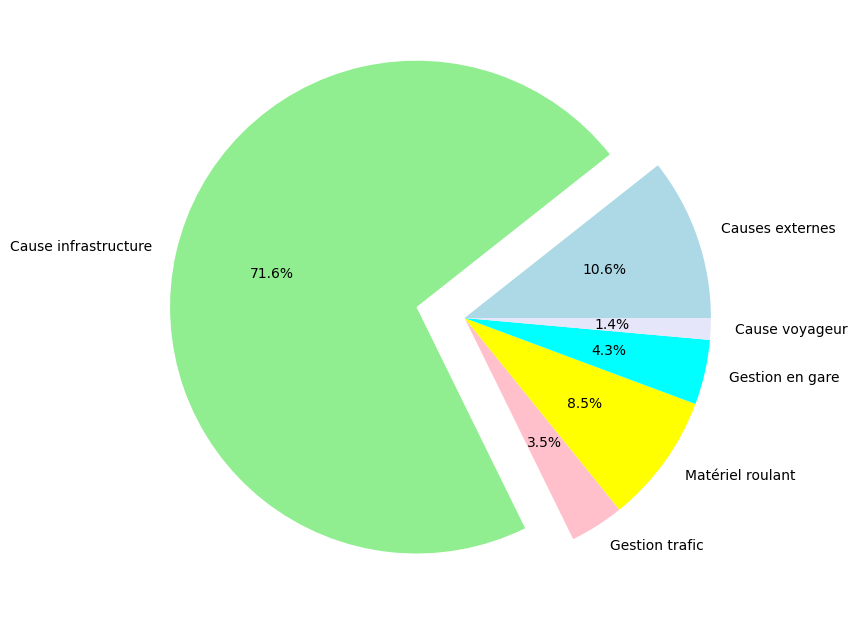

In [37]:
plt.pie(dfparisbordeaux.loc[3126],
        colors=["lightblue", "lightgreen", "pink", "yellow", "cyan", "lavender"],
        explode = [0, 0.2, 0, 0, 0, 0],
        labels=['Causes externes', 'Cause infrastructure', 'Gestion trafic', 'Matériel roulant', 'Gestion en gare', 'Cause voyageur'],
        autopct="%2.1f%%")
plt.show()

Nous voyons ici qu'**en janvier 2020** sur **l'axe Montparnasse-Bordeaux**, les perturbations de la circulation causant des retards était pour **71,6%** des cas, dûes à des **soucis d'infrastructures**. D'autres **causes externes** en sont resppnsables à **10,6%**. En revanche, les retards pour cause de prise en compte des voyageurs (affluence, correspondance, etc) sont très peu fréquents. 

# III - Analyse bidimensionnelle

### Réalisons l'analyse bidimensionnelle des données de notre de jeu. Afin de limiter le nombre de variables, nous allons nous intéresser uniquement au nombre de trains programmés, de trains annulés, de trains en retards à l'arrivée, ainsi que le temps et la cause de leurs retard.


In [141]:
df.columns

Index(['Date', 'Service', 'Gare_depart', 'Gare_arrivee',
       'Duree_moyenne_trajet', 'Nombre_circulations_prevues',
       'Nombre_trains_annules', 'Nombre_trains_retard_depart',
       'Retard_moyen_trains_depart', 'Retard_moyen_tous_trains_depart',
       'Nombre_trains_retard_arrivee', 'Retard_moyen_trains_arrivee',
       'Retard_moyen_tous_trains_arrivee', 'Nombre_trains_retard_sup15min',
       'Retard_moyen_trains_retard_sup15min_si_liaison',
       'Nombre_trains_retard_sup30min', 'Nombre_trains_retard_sup30min',
       'Prct_retard_causes_externes', 'Prct_retard_cause_infrastructure',
       'Prct_retard_cause_gestion_trafic',
       'Prct_retard_cause_matériel_roulant', 'Prct_retard_cause_gestion_gare',
       'Prct_retard_cause_voyageurs'],
      dtype='object')

In [38]:
df1bidim = df[['Date', 'Service', 'Gare_depart', 'Gare_arrivee',
       'Nombre_circulations_prevues',
       'Nombre_trains_annules',
       'Nombre_trains_retard_arrivee', 'Retard_moyen_trains_arrivee',
       'Prct_retard_causes_externes', 'Prct_retard_cause_infrastructure',
       'Prct_retard_cause_gestion_trafic',
       'Prct_retard_cause_matériel_roulant', 'Prct_retard_cause_gestion_gare',
       'Prct_retard_cause_voyageurs']]

In [40]:
plotting.scatter_matrix(df1bidim, figsize=(50,50));

In [147]:
df1bidim.corr()

/var/folders/p8/3r2rm9j501jby2s702qkpssc0000gn/T/ipykernel_5429/3226191939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1bidim.corr()


Nombre_circulations_prevues  \
Nombre_circulations_prevues                            1.000000   
Nombre_trains_annules                                  0.215191   
Nombre_trains_retard_arrivee                           0.733441   
Retard_moyen_trains_arrivee                           -0.073836   
Prct_retard_causes_externes                            0.016907   
Prct_retard_cause_infrastructure                      -0.006948   
Prct_retard_cause_gestion_trafic                       0.009595   
Prct_retard_cause_matériel_roulant                     0.090844   
Prct_retard_cause_gestion_gare                         0.104838   
Prct_retard_cause_voyageurs                            0.131493   

                                    Nombre_trains_annules  \
Nombre_circulations_prevues                      0.215191   
Nombre_trains_annules                            1.000000   
Nombre_trains_retard_arrivee                     0.097371   
Retard_moyen_trains_arrivee                     -0.076297   
Prct_retard_causes_externes                      0.081709   
Prct_retard_cause_infrastructure                 0.043900   
Prct_retard_cause_gestion_trafic                -0.086906   
Prct_retard_cause_matériel_roulant              -0.023234   
Prct_retard_cause_gestion_gare                   0.017149   
Prct_retard_cause_voyageurs                     -0.019453   

                                    Nombre_trains_retard_arrivee  \
Nombre_circulations_prevues                             0.733441   
Nombre_trains_annules                                   0.097371   
Nombre_trains_retard_arrivee                            1.000000   
Retard_moyen_trains_arrivee                            -0.064543   
Prct_retard_causes_externes                             0.008229   
Prct_retard_cause_infrastructure                        0.003855   
Prct_retard_cause_gestion_trafic                        0.132714   
Prct_retard_cause_matériel_roulant                     -0.003981   
Prct_retard_cause_gestion_gare                          0.051440   
Prct_retard_cause_voyageurs                             0.022812   

                                    Retard_moyen_trains_arrivee  \
Nombre_circulations_prevues                           -0.073836   
Nombre_trains_annules                                 -0.076297   
Nombre_trains_retard_arrivee                          -0.064543   
Retard_moyen_trains_arrivee                            1.000000   
Prct_retard_causes_externes                            0.248631   
Prct_retard_cause_infrastructure                       0.051036   
Prct_retard_cause_gestion_trafic                      -0.127431   
Prct_retard_cause_matériel_roulant                     0.071713   
Prct_retard_cause_gestion_gare                        -0.041539   
Prct_retard_cause_voyageurs                            0.044869   

                                    Prct_retard_causes_externes  \
Nombre_circulations_prevues                            0.016907   
Nombre_trains_annules                                  0.081709   
Nombre_trains_retard_arrivee                           0.008229   
Retard_moyen_trains_arrivee                            0.248631   
Prct_retard_causes_externes                            1.000000   
Prct_retard_cause_infrastructure                      -0.192478   
Prct_retard_cause_gestion_trafic                      -0.226378   
Prct_retard_cause_matériel_roulant                    -0.216584   
Prct_retard_cause_gestion_gare                        -0.163769   
Prct_retard_cause_voyageurs                           -0.165645   

                                    Prct_retard_cause_infrastructure  \
Nombre_circulations_prevues                                -0.006948   
Nombre_trains_annules                                       0.043900   
Nombre_trains_retard_arrivee                                0.003855   
Retard_moyen_trains_arrivee                                 0.051036   
Prct_retard_causes_externes              

Nous remarquons une **correlation linéaire** entre le **nombre de trains annulés et le nombre de trains prévus**. Cette **corrélation est cependant faible** puisqu'elle est de 0.2 sur l'échelle de Cohen. Cela s'explique notamment car on peut voir qu'il y a nen fait 2 tendances qui se dessinent : une **concentration du nombre trains annulés proche de 0** et une autre **concentration plus linéaire et croissante**, cela annule donc la force de correlation. 


Nous remarquons également une **correlation linéaire croissante** entre le **nombre de trains prévus et le nombre de trains en retard**. Cette corrrélation a un **indicateur de force de 0.7**, elle est donc importante selonl'échelle de Cohen.


En ce qui concerne les **différentes causes de retard**, nous remarquons des répartitions beaucoup plus diffuses mais surtout de **l'incompatibilité entres elles** (cela se voit surtout par les sortes de triangles que forment leur répartition). Nous avons en effet une **dépenance de dispersion**, c'est-à-dire que **quand l'une est grande les autres n'arrivent pas à etre grandes aussi**. Cela parait logique puisque ce sont des pourcentages et que leur somme ne peut pas dépasser 100. 

### Vérifier si les correlations sont significatives

Grâce à un `pariwise_corr()`, nous pouvons voir à combien s'élève la p-valeur pour chaque association possible de variable.

In [148]:
df1bidim.pairwise_corr()

X                                   Y  \
0          Nombre_circulations_prevues               Nombre_trains_annules   
1          Nombre_circulations_prevues        Nombre_trains_retard_arrivee   
2          Nombre_circulations_prevues         Retard_moyen_trains_arrivee   
3          Nombre_circulations_prevues         Prct_retard_causes_externes   
4          Nombre_circulations_prevues    Prct_retard_cause_infrastructure   
5          Nombre_circulations_prevues    Prct_retard_cause_gestion_trafic   
6          Nombre_circulations_prevues  Prct_retard_cause_matériel_roulant   
7          Nombre_circulations_prevues      Prct_retard_cause_gestion_gare   
8          Nombre_circulations_prevues         Prct_retard_cause_voyageurs   
9                Nombre_trains_annules        Nombre_trains_retard_arrivee   
10               Nombre_trains_annules         Retard_moyen_trains_arrivee   
11               Nombre_trains_annules         Prct_retard_causes_externes   
12               Nombre_trains_annules    Prct_retard_cause_infrastructure   
13               Nombre_trains_annules    Prct_retard_cause_gestion_trafic   
14               Nombre_trains_annules  Prct_retard_cause_matériel_roulant   
15               Nombre_trains_annules      Prct_retard_cause_gestion_gare   
16               Nombre_trains_annules         Prct_retard_cause_voyageurs   
17        Nombre_trains_retard_arrivee         Retard_moyen_trains_arrivee   
18        Nombre_trains_retard_arrivee         Prct_retard_causes_externes   
19        Nombre_trains_retard_arrivee    Prct_retard_cause_infrastructure   
20        Nombre_trains_retard_arrivee    Prct_retard_cause_gestion_trafic   
21        Nombre_trains_retard_arrivee  Prct_retard_cause_matériel_roulant   
22        Nombre_trains_retard_arrivee      Prct_retard_cause_gestion_gare   
23        Nombre_trains_retard_arrivee         Prct_retard_cause_voyageurs   
24         Retard_moyen_trains_arrivee         Prct_retard_causes_externes   
25         Retard_moyen_trains_arrivee    Prct_retard_cause_infrastructure   
26         Retard_moyen_trains_arrivee    Prct_retard_cause_gestion_trafic   
27         Retard_moyen_trains_arrivee  Prct_retard_cause_matériel_roulant   
28         Retard_moyen_trains_arrivee      Prct_retard_cause_gestion_gare   
29         Retard_moyen_trains_arrivee         Prct_retard_cause_voyageurs   
30         Prct_retard_causes_externes    Prct_retard_cause_infrastructure   
31         Prct_retard_causes_externes    Prct_retard_cause_gestion_trafic   
32         Prct_retard_causes_externes  Prct_retard_cause_matériel_roulant   
33         Prct_retard_causes_externes      Prct_retard_cause_gestion_gare   
34         Prct_retard_causes_externes         Prct_retard_cause_voyageurs   
35    Prct_retard_cause_infrastructure    Prct_retard_cause_gestion_trafic   
36    Prct_retard_cause_infrastructure  Prct_retard_cause_matériel_roulant   
37    Prct_retard_cause_infrastructure      Prct_retard_cause_gestion_gare   
38    Prct_retard_cause_infrastructure         Prct_retard_cause_voyageurs   
39    Prct_retard_cause_gestion_trafic  Prct_retard_cause_matériel_roulant   
40    Prct_retard_cause_gestion_trafic      Prct_retard_cause_gestion_gare   
41    Prct_retard_cause_gestion_trafic         Prct_retard_cause_voyageurs   
42  Prct_retard_cause_matériel_roulant      Prct_retard_cause_gestion_gare   
43  Prct_retard_cause_matériel_roulant         Prct_retard_cause_voyageurs   
44      Prct_retard_cause_gestion_gare         Prct_retard_cause_voyageurs   

     method alternative     n         r           CI95%          p-unc  \
0   pearson   two-sided  7305  0.215191    [0.19, 0.24]   2.795995e-77   
1   pearson   two-sided  7305  0.733441    [0.72, 0.74]   0.000000e+00   
2   pearson   two-sided  7305 -0.073836   [-0.1, -0.05]   2.644616e-10   
3   pearson   two-sided  7305  0.016907   [-0.01, 0.04]   1.484892e-01   
4   pearson   two-sided  7305 -0.006948   [-0.03, 0.02]   5.526609e-01   
5   

`rcorr()`, nous permet de voir si les significativités entre associations sont fortes ou faibles. 

In [149]:
df1bidim.rcorr()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/correlation.py:1082: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = self.corr(method=method).round(decimals)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/correlation.py:1087: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_upper = self.corr(method=lambda x, y: pearsonr(x, y)[1])


Nombre_circulations_prevues  \
Nombre_circulations_prevues                                  -   
Nombre_trains_annules                                    0.215   
Nombre_trains_retard_arrivee                             0.733   
Retard_moyen_trains_arrivee                             -0.074   
Prct_retard_causes_externes                              0.017   
Prct_retard_cause_infrastructure                        -0.007   
Prct_retard_cause_gestion_trafic                          0.01   
Prct_retard_cause_matériel_roulant                       0.091   
Prct_retard_cause_gestion_gare                           0.105   
Prct_retard_cause_voyageurs                              0.131   

                                   Nombre_trains_annules  \
Nombre_circulations_prevues                          ***   
Nombre_trains_annules                                  -   
Nombre_trains_retard_arrivee                       0.097   
Retard_moyen_trains_arrivee                       -0.076   
Prct_retard_causes_externes                        0.082   
Prct_retard_cause_infrastructure                   0.044   
Prct_retard_cause_gestion_trafic                  -0.087   
Prct_retard_cause_matériel_roulant                -0.023   
Prct_retard_cause_gestion_gare                     0.017   
Prct_retard_cause_voyageurs                       -0.019   

                                   Nombre_trains_retard_arrivee  \
Nombre_circulations_prevues                                 ***   
Nombre_trains_annules                                       ***   
Nombre_trains_retard_arrivee                                  -   
Retard_moyen_trains_arrivee                              -0.065   
Prct_retard_causes_externes                               0.008   
Prct_retard_cause_infrastructure                          0.004   
Prct_retard_cause_gestion_trafic                          0.133   
Prct_retard_cause_matériel_roulant                       -0.004   
Prct_retard_cause_gestion_gare                            0.051   
Prct_retard_cause_voyageurs                               0.023   

                                   Retard_moyen_trains_arrivee  \
Nombre_circulations_prevues                                ***   
Nombre_trains_annules                                      ***   
Nombre_trains_retard_arrivee                               ***   
Retard_moyen_trains_arrivee                                  -   
Prct_retard_causes_externes                              0.249   
Prct_retard_cause_infrastructure                         0.051   
Prct_retard_cause_gestion_trafic                        -0.127   
Prct_retard_cause_matériel_roulant                       0.072   
Prct_retard_cause_gestion_gare                          -0.042   
Prct_retard_cause_voyageurs                              0.045   

                                   Prct_retard_causes_externes  \
Nombre_circulations_prevues                                      
Nombre_trains_annules                                      ***   
Nombre_trains_retard_arrivee                                     
Retard_moyen_trains_arrivee                                ***   
Prct_retard_causes_externes                                  -   
Prct_retard_cause_infrastructure                        -0.192   
Prct_retard_cause_gestion_trafic                        -0.226   
Prct_retard_cause_matériel_roulant                      -0.217   
Prct_retard_cause_gestion_gare                          -0.164   
Prct_retard_cause_voyageurs                             -0.166   

                                   Prct_retard_cause_infrastructure  \
Nombre_circulations_prevues                                           
Nombre_trains_annules                                           ***   
Nombre_trains_retard_arrivee                                          
Retard_moyen_trains_arrivee                                     ***   
Prct_retard_causes_externes                                     ***   
Prct_retard_cause_infrastruct

Les corréaltions que nous avons observé précédemment s'avèrent **significatives puisque leur p-valeur est inférieure à 0.05**.

Nous pouvons tout de même préciser que nous observons des **fortes significativités entre les causes de retard** (c'est à dire que lorsqu'une cause a un pourcentage élevé, l'autres/les autres sont automatiquement plus faibles. 

Nous remarquons également une **forte significativité entre le nombre de trains prévus et le nombre de trains annulés ou en retards à l'arrivée**. 

### <span style="color:darkblue">Nous avons remarqué plus haut qu'il y avait des hausses de retard des trains durant les périodes estivales. Il serait cependant intéressant de vérifier si cette constatation est fondée et s'il existe bien une influence de la période sur le nombre de trains en retard.</span>

### Choisissons deux dates et vérifions s'il existe un effet significatif de la période sur le nombre de trains en retard.

Nous gardons dans un premier temps dans un nouveau dataframe uniquement les variables date et nombre de trains en retard, et nous ne gardons que les 2 dates auxuqelles nous avons décidé de nous interesser : **janvier 2022** et **juillet 2022**.

In [150]:
df1date = df1bidim[['Date', 'Nombre_trains_retard_arrivee']].query('Date == ["2022-01", "2022-07"]')
df1date

Date  Nombre_trains_retard_arrivee
5961  2022-01                             7
5962  2022-01                             9
5963  2022-01                             2
5964  2022-01                            18
5965  2022-01                             8
...       ...                           ...
6809  2022-07                            63
6810  2022-07                            94
6811  2022-07                            31
6812  2022-07                            21
6813  2022-07                           254

[244 rows x 2 columns]

In [153]:
from scipy.stats import ttest_ind
a = df1date.query('Date == ["2022-01"]')['Nombre_trains_retard_arrivee']
b = df1date.query('Date == ["2022-07"]')['Nombre_trains_retard_arrivee']
pg.ttest(a,b, paired=False)

T         dof alternative         p-val             CI95%  \
T-test -8.443155  154.012097   two-sided  2.136863e-14  [-58.71, -36.44]   

         cohen-d       BF10  power  
T-test  1.074264  1.853e+12    1.0

La p-valeur est **statistiquement significaitve** puisqu'inférieur à 5%, nous pouvons donc rejetter l'hyopthèse h0 selon laqeulle il n'y a pas d'effet significatif de la date sur les retards et dire qu'il existe **effectivement un effet de la période sur le retard**.